# Desafio Análise de Dados

## Plano de ação

 

Em primeiro lugar necessito realizar a importação das bibliotecas necessárias para gestão dos dados e em seguida extrair os mesmos para DataFrames com os quais irei trabalhar ao longo da análise.

Em seguida entender o perfil do cliente e das agências. 

- Quais são as agências, 

- Onde elas estão localizadas, 

- Quais agencias possuem mais clientes 

- Qual o saldo médio de cada uma dessas agencias 

- Quantos clientes em média cada colaborador tem 

- Qual o valor total em média que os colaboradores que os colaboradores manejam de saldo 

 

Na sequência entender as transações realizadas pelos clientes. 

- Quais tipos de transações foram mais realizadas? 

- Pensando em 2010 (ano inicial), 2019 (ano anterior a implantação do pix) e 2020 (ano de implantação do pix), quais transações nas agências foram realizadas e se houve alguma mudança? 

 

Trabalhar também com os financiamentos realizados. 

- Do total de financiamentos, quanto em capital já foi enviado, aprovado, está em análise ou validação dos documentos? 

- Quantas propostas ao todo de financiamento foram realizadas? 

- Por ano, qual o valor de financiamentos? 

- Qual a distribuição dos valores para financiamento conforme o status da proposta ao longo dos anos? 

 

Em seguida analisar quais as diferenças entre usuários de agências digitais e agências físicas. 

- Quais transações são mais realizadas em agencias digitais? 

- Quais transações são mais realizadas em agencias físicas? 

- Existe diferença entre os saldos dos usuários de agencias digitais e de agencias físicas? 

- Existe diferença entre os valores das propostas de crédito para usuários de agências digitais e agências físicas? 

 

Em seguida fazer as coortes para entender: 

- Se há algum padrão de gastos nas transações no geral e a partir de 2018; 

- Qual o tempo de vida das coortes? 

- Qual a taxa de retenção dos clientes? 


Por último utilizarei do machine learning para separar por grupos os dados
- Kmeans (descobrir o total de grupos)
- Clusterização (para ver os padrão dos clientes conforme as caracteristicas)

## 1° importar as bibliotecas 

In [1]:
#importar bibliotecas
import pandas as pd
from matplotlib import pyplot as plt #plotagem
import seaborn as sns #plotagem
import plotly.express as px #plotagem
from matplotlib.ticker import ScalarFormatter #formatação de gráficos
from scipy import stats as st  #análise estatística
import numpy as np 

##bibliotecas para aprendizado de maquina
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score 

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV


## 2° Importar e criar os dataframes

In [2]:
#criar as tabelas para trabalhar

agencias = pd.read_csv("data/agencias.csv")
clientes = pd.read_csv('data/clientes.csv')
colaborador_agencia = pd.read_csv('data/colaborador_agencia.csv')
colaboradores = pd.read_csv('data/colaboradores.csv')
contas = pd.read_csv('data/contas.csv')
propostas_credito = pd.read_csv('data/propostas_credito.csv')
transacoes = pd.read_csv('data/transacoes.csv')

## 3° Analisar cada um dos dataframes e transformar os dados conforme necessário

### 3.1 DataFrame 'agencias'

In [3]:
agencias.info()

print()
print(agencias.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes

   cod_agencia              nome  \
0            7   Agência Digital   
1            1    Agência Matriz   
2            2   Agência Tatuapé   
3            3  Agência Campinas   
4            4    Agência Osasco   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
2  Praça Sílvio Romero, 15

Conclusões
- Os dados dos cabeçalhos se encontram de padronizados em letra minuscula e snake case. 
- O arquivo possui dez entradas e nenhuma das células apresenta valores nulos.
- É necessário alterar o tipo de dados para datetime na coluna data_abertura.

In [4]:
#transformando os dados para datetime
agencias['data_abertura'] = pd.to_datetime(agencias['data_abertura'])

#conferindo
agencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_agencia    10 non-null     int64         
 1   nome           10 non-null     object        
 2   endereco       10 non-null     object        
 3   cidade         10 non-null     object        
 4   uf             10 non-null     object        
 5   data_abertura  10 non-null     datetime64[ns]
 6   tipo_agencia   10 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 692.0+ bytes


In [138]:
#exportar dados para usar no power bi
agencias.to_csv('data_for_dashboards/agencias_pb.csv')

### 3.2 DataFrame 'clientes'

In [5]:
clientes.info()
print()
print(clientes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_cliente      998 non-null    int64 
 1   primeiro_nome    998 non-null    object
 2   ultimo_nome      998 non-null    object
 3   email            998 non-null    object
 4   tipo_cliente     998 non-null    object
 5   data_inclusao    998 non-null    object
 6   cpfcnpj          998 non-null    object
 7   data_nascimento  998 non-null    object
 8   endereco         998 non-null    object
 9   cep              998 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB

   cod_cliente primeiro_nome ultimo_nome                         email  \
0           28       Sabrina        Dias  moreiraemanuelly@example.org   
1          674   Luiz Felipe        Dias     pedroferreira@example.org   
2          693         Renan        Dias            ogomes@example.net   
3      

Conclusões
- É necessário transformar as colunas de data (data_inclusao e data_nascimento) para corresponderem ao formato datetime;
- É necessário padronizar o formato CEP para ter o traço.
- Não há células com valores nulos dentro do DataFrame 'clientes'

In [6]:
#arrumar os dados correspondentes para datetime

clientes['data_inclusao'] = pd.to_datetime(clientes['data_inclusao'])
clientes['data_nascimento'] = pd.to_datetime(clientes['data_nascimento'])


In [7]:
#Criar uma função para arrumar os dados de CEP

def formatar_cep(cep):
    if '-' not in cep:
        return f"{cep[:5]}-{cep[5:]}"
    else:
        return cep

# Aplicar a função à coluna desejada
clientes['cep'] = clientes['cep'].apply(formatar_cep)

In [8]:
#conferir se realizou a troca
print(clientes['cep'].sample(10))

178    58314-883
714    53746-671
5      07814-131
52     67484-257
259    11833-620
465    57218-048
97     88390-892
847    11452-459
789    42069-597
752    97675-667
Name: cep, dtype: object


In [140]:
#criar o arquivo clientes para usar no power BI
clientes.to_csv('data_for_dashboards/clientes_pb.csv')

### 3.3 DataFrame 'colaborador_agencia'

In [9]:
#conferir os dados
colaborador_agencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cod_colaborador  100 non-null    int64
 1   cod_agencia      100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


Conclusões
- O DataFrame colaborador_agencia não possui valores nulos nas células, nem valores que precisam ter seus tipos alterados.

In [141]:
#criar arquivo colaborador_agencia para usar no power BI
colaborador_agencia.to_csv('data_for_dashboards/colaborador_agencia_pb.csv')

### 3.4 DataFrame 'colaboradores'

In [10]:
#Conferindo os dados do DataFrame 'colaboradores'

colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_colaborador  100 non-null    int64 
 1   primeiro_nome    100 non-null    object
 2   ultimo_nome      100 non-null    object
 3   email            100 non-null    object
 4   cpf              100 non-null    object
 5   data_nascimento  100 non-null    object
 6   endereco         100 non-null    object
 7   cep              100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [11]:
#amostrar o formato de data de nascimento dos colaboradores 
print(colaboradores['data_nascimento'].sample(5))

#converter o tipo de dados para datetime

colaboradores['data_nascimento'] = pd.to_datetime(colaboradores['data_nascimento'])

89    1993-09-18
2     1986-12-18
31    1985-03-31
51    1964-09-19
42    1969-06-19
Name: data_nascimento, dtype: object


In [12]:
#alterar o nome das colunas para não confundir na hora do merge

colaboradores.rename(columns={'endereco':'endereco_colaborador',
                              'cpf':'cpf_colaborador',
                              'cep':'cep_colaborador',
                              'email':'email_colaborador',
                              'primeiro_nome':'primeiro_nome_colab',
                              'ultimo_nome':'ultimo_nome_colab',
                              'data_nascimento':'data_nascimento_colab'},inplace=True,)

In [13]:
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cod_colaborador        100 non-null    int64         
 1   primeiro_nome_colab    100 non-null    object        
 2   ultimo_nome_colab      100 non-null    object        
 3   email_colaborador      100 non-null    object        
 4   cpf_colaborador        100 non-null    object        
 5   data_nascimento_colab  100 non-null    datetime64[ns]
 6   endereco_colaborador   100 non-null    object        
 7   cep_colaborador        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.4+ KB


Conclusões
- O DataFrame 'colaboradores' não possui valores nulos e foi necessário alterar o tipo de dados do campo data_nascimento para datetime.

In [145]:
#Criar o arquivo colaboradores_pb para utilizar no power Bi
colaboradores.to_csv('data_for_dashboards/colaboradores_pb.csv')

### 3.5 DataFrame 'contas'

In [14]:
#entender os dados do DataFrame 'contas'

contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_conta               999 non-null    int64  
 1   cod_cliente             999 non-null    int64  
 2   cod_agencia             999 non-null    int64  
 3   cod_colaborador         999 non-null    int64  
 4   tipo_conta              999 non-null    object 
 5   data_abertura           999 non-null    object 
 6   saldo_total             999 non-null    float64
 7   saldo_disponivel        999 non-null    float64
 8   data_ultimo_lancamento  999 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [15]:
print(contas[['data_abertura','data_ultimo_lancamento']].sample(5))

               data_abertura          data_ultimo_lancamento
707  2017-04-11 13:13:00 UTC         2021-04-10 22:33:27 UTC
781  2019-05-18 14:07:00 UTC  2022-12-30 00:00:00.042409 UTC
948  2020-06-08 14:51:00 UTC         2022-12-29 23:59:57 UTC
377  2018-01-27 14:50:00 UTC         2022-09-02 11:18:09 UTC
301  2020-08-10 12:55:00 UTC         2022-06-08 10:09:04 UTC


In [16]:
#transformar as colunas de data para o formato datetime
contas['data_abertura'] = pd.to_datetime(contas['data_abertura'])

In [17]:
contas['data_ultimo_lancamento'] = pd.to_datetime(contas['data_ultimo_lancamento'], format='mixed')

In [142]:
#criar dataframe contas_pb para utilizar no power bi

contas.to_csv('data_for_dashboards/contas_pb.csv')

### 3.6 DataFrame 'propostas_credito'

In [18]:
#entendendo os dados do DataFrame propostas_credito

propostas_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_proposta           2000 non-null   int64  
 1   cod_cliente            2000 non-null   int64  
 2   cod_colaborador        2000 non-null   int64  
 3   data_entrada_proposta  2000 non-null   object 
 4   taxa_juros_mensal      2000 non-null   float64
 5   valor_proposta         2000 non-null   float64
 6   valor_financiamento    2000 non-null   float64
 7   valor_entrada          2000 non-null   float64
 8   valor_prestacao        2000 non-null   float64
 9   quantidade_parcelas    2000 non-null   int64  
 10  carencia               2000 non-null   int64  
 11  status_proposta        2000 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 187.6+ KB


In [19]:
#transformar os dados para o formato datetime da coluna 'data_entrada_proposta'
propostas_credito['data_entrada_proposta'] = pd.to_datetime(propostas_credito['data_entrada_proposta'])

Conclusões 
- O dataframe 'propostas_credito' não possui valores nulos e preciso que a coluna 'data_entrada_proposta' tivesse seu valor alterado para o formato datetime.

In [143]:
#criar dataframe propostas_credito_pb para utilizar em power BI
propostas_credito.to_csv('data_for_dashboards/propostas_credito_pb.csv')

### 3.7 DataFrame 'transacoes'


In [20]:
#entender os dados do DataFrame 'transacoes'
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_transacao    71999 non-null  int64  
 1   num_conta        71999 non-null  int64  
 2   data_transacao   71999 non-null  object 
 3   nome_transacao   71999 non-null  object 
 4   valor_transacao  71999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [21]:
#transformar a coluna 'data_transacao' para o formato datetime

transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'], format='mixed')

In [144]:
#criar dataframe transacoes_pb para utilizar em power bi
transacoes.to_csv('data_for_dashboards/transacoes_pb.csv')

## 4° Usando esses dados

### 4.1 Perfil do cliente e agencias

In [22]:
#tipo de contas dos usuários

tipo_de_conta = contas['tipo_conta'].value_counts()

print(tipo_de_conta)

tipo_conta
PF    999
Name: count, dtype: int64


Conclusão
- Todas as contas do banco são de pessoa física.

In [23]:
print(agencias[['cod_agencia','nome']].sort_values(by='cod_agencia'))

   cod_agencia                    nome
1            1          Agência Matriz
2            2         Agência Tatuapé
3            3        Agência Campinas
4            4          Agência Osasco
5            5    Agência Porto Alegre
6            6  Agência Rio de Janeiro
0            7         Agência Digital
7            8         Agência Jardins
8            9   Agência Florianópolis
9           10          Agência Recife


Text(0.5, 1.0, 'Saldo total por agência')

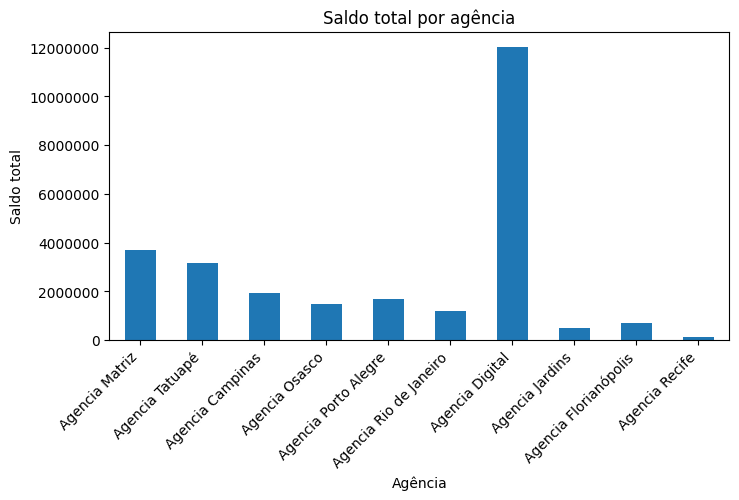

In [24]:
#Qual o saldo total por agência?
saldo_total_por_agencia = contas.groupby('cod_agencia')['saldo_total'].sum()

nome_agencias = ['Agencia Matriz', 'Agencia Tatuapé','Agencia Campinas','Agencia Osasco','Agencia Porto Alegre','Agencia Rio de Janeiro','Agencia Digital','Agencia Jardins','Agencia Florianópolis','Agencia Recife']

plt.figure(figsize=[8,4])
saldo_total_por_agencia.plot(kind='bar')
plt.ylabel("Saldo total")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Saldo total por agência')


Text(0.5, 1.0, 'Clientes por agência')

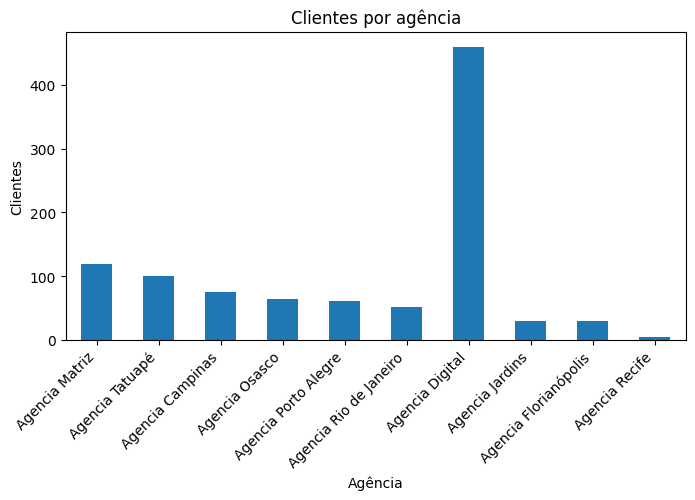

In [25]:
#Quantos clientes por agência?
clientes_por_agencia = contas.groupby('cod_agencia')['cod_cliente'].count()
plt.figure(figsize=[8,4])
clientes_por_agencia.plot(kind='bar')
plt.ylabel("Clientes")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Clientes por agência')


Text(0.5, 1.0, 'Saldo médio por agência')

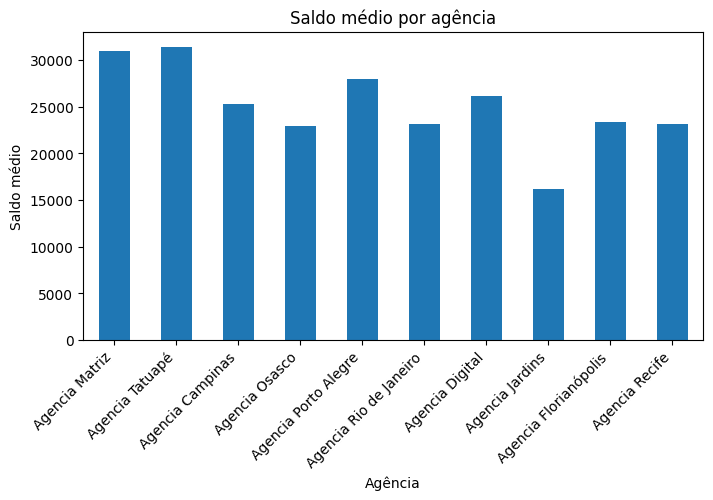

In [26]:
#Qual o aldo médio por agência?
saldo_medio_por_agencia = contas.groupby('cod_agencia')['saldo_total'].mean()
plt.figure(figsize=[8,4])
saldo_medio_por_agencia.plot(kind='bar')
plt.ylabel("Saldo médio")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Saldo médio por agência')

Conclusão

- É possível averiguar que a agencia digital é a que possui o maior número de clientes, assim como o maior saldo. Entretando, ao avaliar o saldo médio por agência, temos as agências Matriz e Tatuapé como com maior saldo médio.

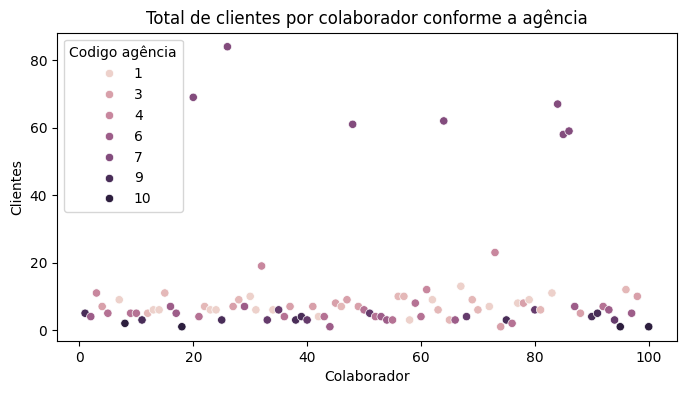

In [27]:
#quantos clientes cada colaborador tem?

clientes_por_colaborador = contas.groupby(['cod_colaborador','cod_agencia'])['cod_cliente'].count().reset_index()

plt.figure(figsize=[8,4])
sns.scatterplot(x='cod_colaborador', y='cod_cliente', hue='cod_agencia', data=clientes_por_colaborador)
plt.title("Total de clientes por colaborador conforme a agência")
plt.xlabel('Colaborador')
plt.ylabel('Clientes')
plt.legend(title='Codigo agência')

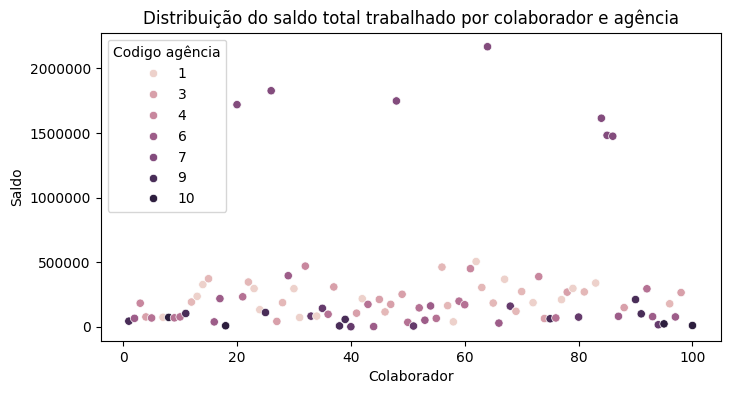

In [28]:
#Qual o saldo movimentado por colaborador?

saldo_por_colaborador_agencia = contas.groupby(['cod_colaborador', 'cod_agencia'])['saldo_total'].sum().reset_index()

plt.figure(figsize=[8,4])
sns.scatterplot(x='cod_colaborador', y='saldo_total', hue='cod_agencia', data=saldo_por_colaborador_agencia)
plt.title('Distribuição do saldo total trabalhado por colaborador e agência')
plt.xlabel('Colaborador')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Saldo")
plt.legend(title='Codigo agência')


Conclusão

- Temos 7 colaboradores dentre todas as agências que trabalham com saldos acima de um milhão de reais.
    - Sendo que a maioria dos colaboradores trabalha com saldos até quinhentos mil reais
- Também temos 7 colaboradores com mais de 50 clientes.
    - Onde a maioria dos colaboradores tem até 20 clientes.


### 4.2 Transações

In [29]:
#criar coluna de data, ano, mês, dia e dia da semana no DataFrame 'trasacoes'
transacoes['data'] = transacoes['data_transacao'].dt.date
transacoes['ano_transacao'] = transacoes['data_transacao'].dt.year
transacoes['month'] = transacoes['data_transacao'].dt.month
transacoes['day'] = transacoes['data_transacao'].dt.day
transacoes['day_of_week'] = transacoes['data_transacao'].dt.day_of_week

#### 4.2.1 Quais tipos de transações foram realizadas por agência?

In [30]:
#primeiro, unir os dataframes 'transacoes' e 'contas' para tirar devinir as transações por agência

transacoes_e_contas = pd.merge(contas, transacoes[['num_conta','nome_transacao','ano_transacao']], on='num_conta')

transacoes_e_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   num_conta               71999 non-null  int64              
 1   cod_cliente             71999 non-null  int64              
 2   cod_agencia             71999 non-null  int64              
 3   cod_colaborador         71999 non-null  int64              
 4   tipo_conta              71999 non-null  object             
 5   data_abertura           71999 non-null  datetime64[ns, UTC]
 6   saldo_total             71999 non-null  float64            
 7   saldo_disponivel        71999 non-null  float64            
 8   data_ultimo_lancamento  71999 non-null  datetime64[ns, UTC]
 9   nome_transacao          71999 non-null  object             
 10  ano_transacao           71999 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(2), in

Text(0, 0.5, '')

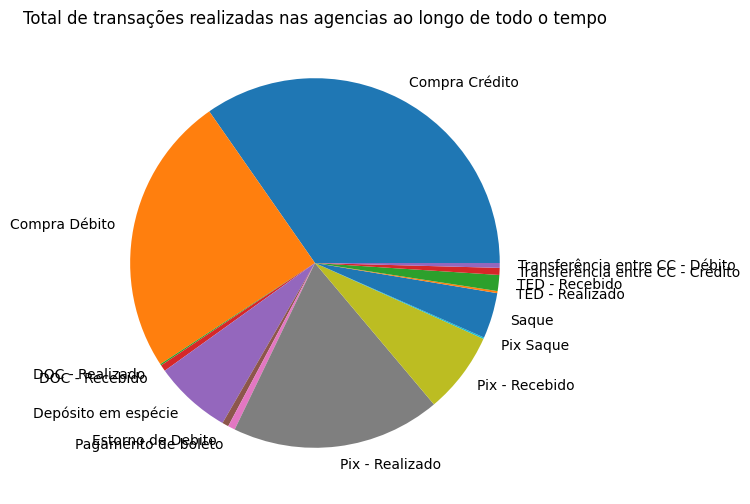

In [31]:
#Qual o total de transações financeiras por agencia?
transacoes_por_agencia = transacoes_e_contas.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_total = transacoes_por_agencia.sum()

transacoes_por_agencia_porcent = (transacoes_por_agencia/transacoes_por_agencia_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias ao longo de todo o tempo')
plt.ylabel('')

In [32]:
print(transacoes_por_agencia_porcent.sort_values(ascending=False))

nome_transacao
Compra Crédito                      34.690760
Compra Débito                       24.530896
Pix - Realizado                     18.283587
Pix - Recebido                       7.130655
Depósito em espécie                  6.758427
Saque                                3.998667
TED - Recebido                       1.395853
Pagamento de boleto                  0.627786
Transferência entre CC - Crédito     0.612509
Estorno de Debito                    0.559730
DOC - Recebido                       0.558341
Transferência entre CC - Débito      0.420839
TED - Realizado                      0.180558
DOC - Realizado                      0.126391
Pix Saque                            0.125002
Name: cod_agencia, dtype: float64


Conclusão
- Temos que dentro de todas as agências, a maior quantidade de transaçoes que ocorre é a compra no crédito (34,69%), seguido do débito (24,53%) e em terceiro a realização de Pix (18,28%).
- Demais transações envolvedo transfêrencias de valores (que não incluem o Pix), estão em sua maioria abaixo 1,4% de participação nas transações.

#### 4.2.1.1 Quais as transações realizadas por agência

In [33]:
#Filtrar os dados para 2010 e 2022

transacoes_e_contas_2010 = transacoes_e_contas[transacoes_e_contas['ano_transacao']==2010]
transacoes_e_contas_2019 = transacoes_e_contas[transacoes_e_contas['ano_transacao']==2019]
transacoes_e_contas_2022 = transacoes_e_contas[transacoes_e_contas['ano_transacao']==2022]

Text(0, 0.5, '')

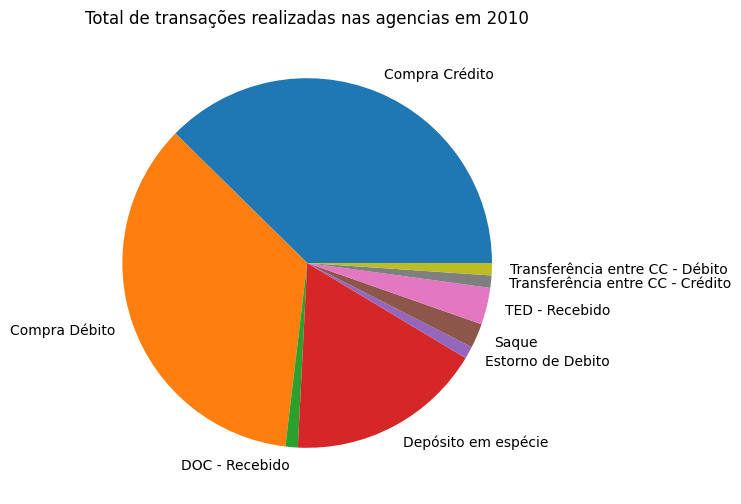

In [34]:
#Qual o total de transações financeiras por agencia em 2010?
transacoes_por_agencia_2010 = transacoes_e_contas_2010.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_2010_total = transacoes_por_agencia_2010.sum()

transacoes_por_agencia_porcent_2010 = (transacoes_por_agencia_2010/transacoes_por_agencia_2010_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent_2010.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias em 2010')
plt.ylabel('')

Text(0, 0.5, '')

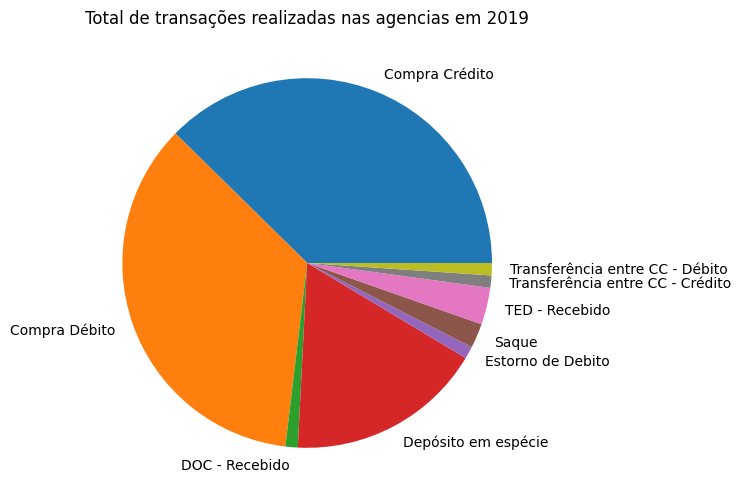

In [35]:
#Qual o total de transações financeiras por agencia em 2019?
transacoes_por_agencia_2019 = transacoes_e_contas_2019.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_2019_total = transacoes_por_agencia_2019.sum()

transacoes_por_agencia_porcent_2019 = (transacoes_por_agencia_2019/transacoes_por_agencia_2019_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent_2010.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias em 2019')
plt.ylabel('')

Text(0, 0.5, '')

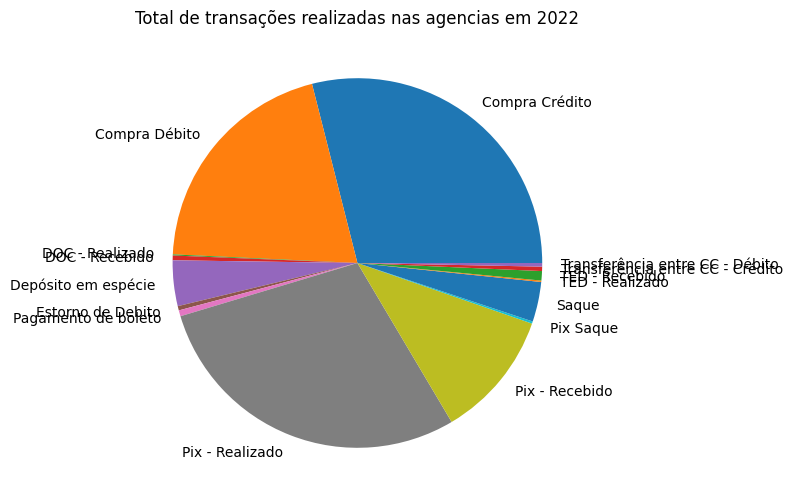

In [36]:
#Qual o total de transações financeiras por agencia em 2022?
transacoes_por_agencia_2022 = transacoes_e_contas_2022.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_2022_total = transacoes_por_agencia_2022.sum()

transacoes_por_agencia_porcent_2022 = (transacoes_por_agencia_2022/transacoes_por_agencia_2022_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_porcent_2022.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias em 2022')
plt.ylabel('')

Conclusão
- Com base nos dois gráficos comparando as transações realizadas em 2010, 2019 (ano anterior a implantação do pix) e 2022, observa-se que compras no crédito ou débito ainda são muito realizadas e que o Pix acabou substituindo os depósitos realizados em espécie.

### 4.2.2 Financiamentos

In [37]:
#Criar a coluna de ano para utilizar posteriormente

propostas_credito['ano'] = propostas_credito['data_entrada_proposta'].dt.year

Text(0, 0.5, 'Contagem de financiamentos')

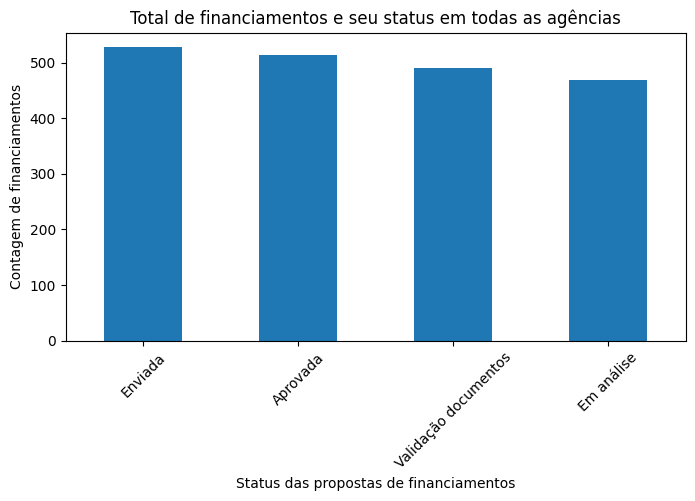

In [38]:
#Em todas as agencias, quantos financiamentos temos e qual o status destes financiamentos?
propostas_de_financiamento = propostas_credito['status_proposta'].value_counts()

plt.figure(figsize=[8,4])
propostas_de_financiamento.plot(kind='bar')
plt.title('Total de financiamentos e seu status em todas as agências')
plt.xlabel('Status das propostas de financiamentos')
plt.xticks(rotation=45)
plt.ylabel('Contagem de financiamentos')


In [39]:
soma_propostas_financiamento = propostas_de_financiamento.sum()

print(f'Desde sua fundação, o banco teve {soma_propostas_financiamento} propostas de financiamento.')

Desde sua fundação, o banco teve 2000 propostas de financiamento.


Text(0, 0.5, 'Capital total (R$)')

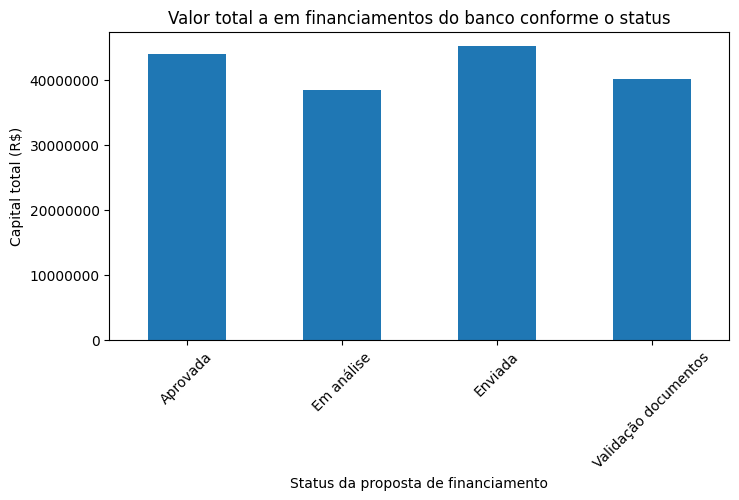

In [40]:
#Valores totais de cada uma das propostas de financiamento

total_valor_financiamento = propostas_credito.groupby('status_proposta')['valor_proposta'].sum()

plt.figure(figsize=[8,4])
total_valor_financiamento.plot(kind='bar')
plt.title('Valor total a em financiamentos do banco conforme o status')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.xlabel('Status da proposta de financiamento')
plt.ylabel("Capital total (R$)")


In [41]:
soma_tota_financiamentos = (total_valor_financiamento.sum()/1000000).round(2)
print(f'Em financiamentos, o banco teve um giro total de R${soma_tota_financiamentos} milhões desde sua fundação.')

Em financiamentos, o banco teve um giro total de R$167.78 milhões desde sua fundação.


Conclusão
- O banco tem 2000 propostas de financiamento distribuidas quase igualmente entre os status desde sua fundação.
- O banco já movimentou entre todos os financiamentos cerca de R$167,78 milhões desde sua fundação.


Text(0, 0.5, 'Valor (R$)')

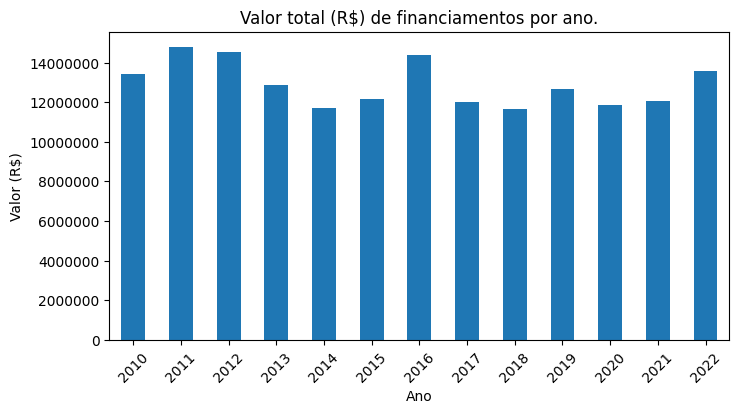

In [42]:
#valor total de financiamento por ano

valor_de_financiamento_ano = propostas_credito.groupby('ano')['valor_proposta'].sum()

plt.figure(figsize=[8,4])
valor_de_financiamento_ano.plot(kind='bar')
plt.title("Valor total (R$) de financiamentos por ano.")
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Valor (R$)')


In [43]:
media_valor_financiamento = valor_de_financiamento_ano.mean().round(2)

print(f'Desde 2010, o banco financia em média R$ {media_valor_financiamento} por ano, servindo de base para quanto caixa o banco precisa ter.')

Desde 2010, o banco financia em média R$ 12906229.24 por ano, servindo de base para quanto caixa o banco precisa ter.


Conclusão
- Ao longo de todos os anos o Banco trabalhou com financiamentos no valor total acima de R$ 100 milhões.

#### 4.2.2.1 Distribuição dos valores médios dos financiamentos por cliente

Text(0.5, 0, 'Valor (R$)')

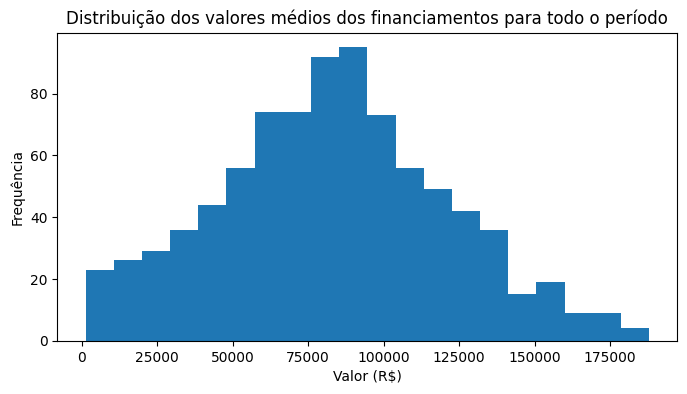

In [44]:
#Qual a distribuição média dos financiamentos por cliente para todo o período?

media_financ_total = propostas_credito.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_total.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos para todo o período')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Conclusão
- Ao longo de todos os anos, as maioria das propostas de financiamento se encontra entre R$ 50000,00 e R$ 110000,00

Text(0.5, 0, 'Valor (R$)')

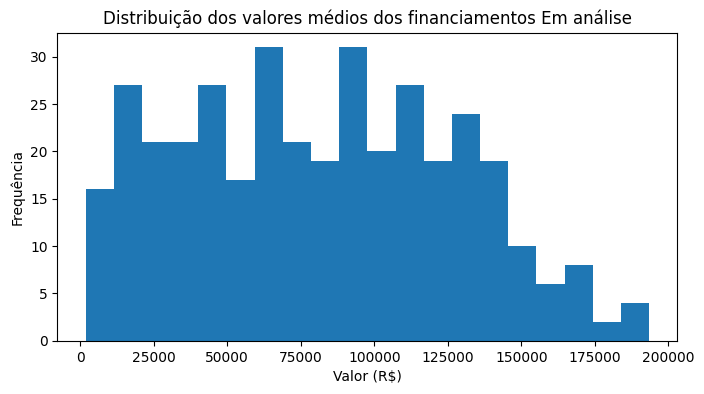

In [45]:
#Qual a média de valor por cliente conforme os financiamentos?

#Financiamentos em análise

financiamento_em_analis = propostas_credito[propostas_credito['status_proposta']=='Em análise']

media_financ_em_analis_por_cliente = financiamento_em_analis.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_em_analis_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos Em análise')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Text(0.5, 0, 'Valor (R$)')

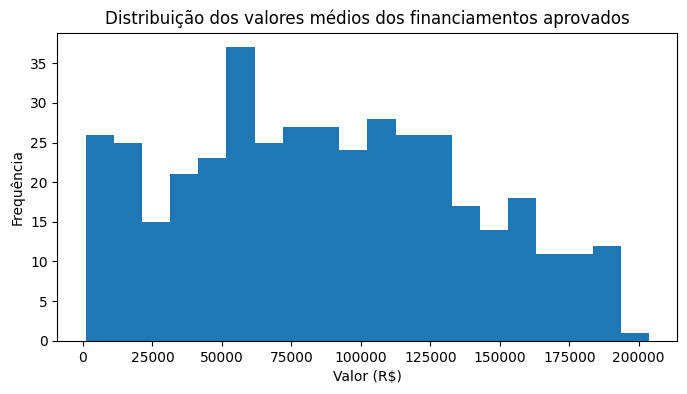

In [46]:
#Financiamentos aprovados

financiamento_aprovado = propostas_credito[propostas_credito['status_proposta']=='Aprovada']

media_financ_aprov_por_cliente = financiamento_aprovado.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_aprov_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos aprovados')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Text(0.5, 0, 'Valor (R$)')

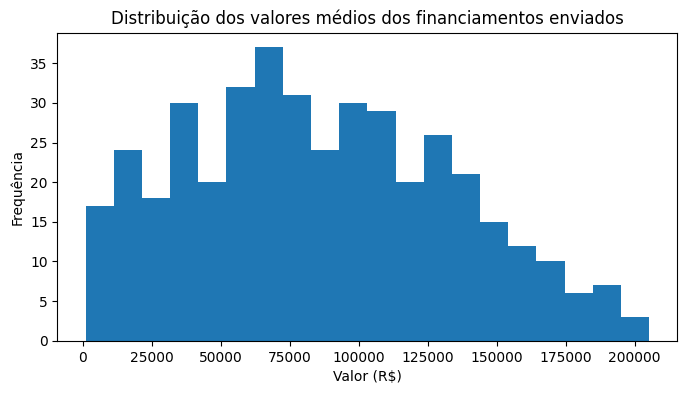

In [47]:
#Financiamentos enviados

financiamento_enviado = propostas_credito[propostas_credito['status_proposta']=='Enviada']

media_financ_enviada_por_cliente = financiamento_enviado.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_enviada_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos enviados')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Text(0.5, 0, 'Valor (R$)')

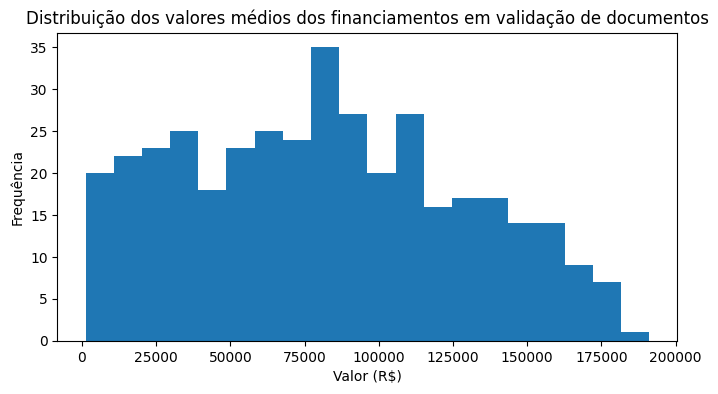

In [48]:
#Financiamentos validação documantos 

financiamento_valid_doc = propostas_credito[propostas_credito['status_proposta']=='Validação documentos']

media_financ_valid_doc_por_cliente = financiamento_valid_doc.groupby('cod_cliente')['valor_proposta'].mean()

plt.figure(figsize=[8,4])
media_financ_valid_doc_por_cliente.plot(kind='hist', bins=20)
plt.title('Distribuição dos valores médios dos financiamentos em validação de documentos')
plt.ylabel('Frequência')
plt.xlabel('Valor (R$)')

Conclusão
- Os valores de pedidos de financiamento possuem uma distribuição semelhante entre os status dos financiamentos, sendo que a grande maioria não ultrapassa R$150.000,00

### 4.3 Agencia digital versus agência física

#### 4.3.1 Trabalhar os dados filtrados para o ano de 2022

In [49]:
#filtrar os dados para agencias digitais (cod_agencia = 7) e agencias físicas (cod_agencia != 7), para o ano de 2022

agencia_digital_2022 = transacoes_e_contas[(transacoes_e_contas['cod_agencia']==7) & (transacoes_e_contas['ano_transacao']==2022)]
agencia_fisica_2022 = transacoes_e_contas[(transacoes_e_contas['cod_agencia']!=7)&(transacoes_e_contas['ano_transacao']==2022)]

Text(0, 0.5, '')

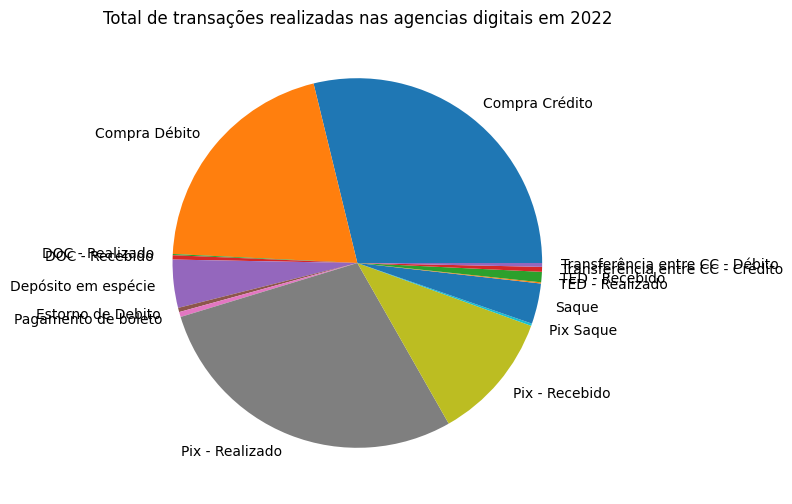

In [50]:
#Qual o total de transações financeiras em agencias digitais?
transacoes_agencia_digital = agencia_digital_2022.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_digital_total = transacoes_agencia_digital.sum()

transacoes_por_agencia_digital_porcent = (transacoes_agencia_digital/transacoes_por_agencia_digital_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_digital_porcent.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias digitais em 2022')
plt.ylabel('')

Text(0, 0.5, '')

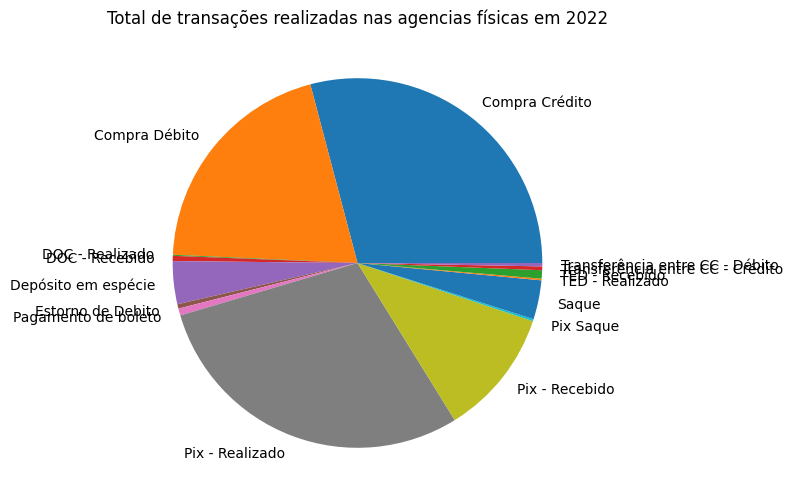

In [51]:
#Qual o total de transações financeiras em agencias físicas?
transacoes_agencia_fisica = agencia_fisica_2022.groupby('nome_transacao')['cod_agencia'].count()

#descobrindo a porcentagem de representação de cada uma das transações
transacoes_por_agencia_fisica_total = transacoes_agencia_fisica.sum()

transacoes_por_agencia_fisica_porcent = (transacoes_agencia_fisica/transacoes_por_agencia_fisica_total)*100

plt.figure(figsize=[10,6])
transacoes_por_agencia_fisica_porcent.plot(kind='pie')
plt.title('Total de transações realizadas nas agencias físicas em 2022')
plt.ylabel('')

In [52]:
print("Principais transações realizadas em 2022 em agência digital")
print(transacoes_por_agencia_digital_porcent.sort_values(ascending=False).head())

print()
print('Principais transações realizadas em 2022 em agência física')
print(transacoes_por_agencia_fisica_porcent.sort_values(ascending=False).head())

Principais transações realizadas em 2022 em agência digital
nome_transacao
Compra Crédito         28.809700
Pix - Realizado        28.513184
Compra Débito          20.411945
Pix - Recebido         11.246426
Depósito em espécie     4.204172
Name: cod_agencia, dtype: float64

Principais transações realizadas em 2022 em agência física
nome_transacao
Pix - Realizado        29.239501
Compra Crédito         29.108967
Compra Débito          20.181612
Pix - Recebido         11.083995
Depósito em espécie     3.751419
Name: cod_agencia, dtype: float64


Conclusão
- Quando consideramos as principais transações realizadas em agência fisica ou digital temos comportamentos semelhantes entre as transações realizadas pelos clientes.
- No ano de 2022 na agência digital a principal transação realizada é a compra no crédito, enquanto na agência física a principal transação realizada foi a realização de Pix.

#### 4.3.2 Analise estatistica comparando se tem diferenças nas transações entre usuários digitais e físicos

#### 4.3.2.1 - Filtrar os dados para trabalhar com informação acima de 2018


In [53]:
#filtrar os dados
agencia_digital_2018_up = transacoes_e_contas[(transacoes_e_contas['cod_agencia']==7) & (transacoes_e_contas['ano_transacao']>=2018)]
agencia_fisica_2018_up = transacoes_e_contas[(transacoes_e_contas['cod_agencia']!=7)&(transacoes_e_contas['ano_transacao']>=2018)]

In [54]:
#utilizando describe para entender os dados de clientes com agencia digital
agencia_digital_2018_up.describe()

,num_conta,cod_cliente,cod_agencia,cod_colaborador,saldo_total,saldo_disponivel,ano_transacao
count,30727.000000,30727.000000,30727.0,30727.000000,30727.000000,30727.000000,30727.000000
mean,506.396101,506.396101,7.0,56.751294,26397.390836,25369.658176,2021.188694
std,281.891962,281.891962,0.0,26.709610,44788.469499,42787.937466,1.264761
min,7.000000,7.000000,7.0,20.000000,1.221000,2.570000,2018.000000
25%,274.000000,274.000000,7.0,26.000000,751.065000,689.650000,2021.000000
50%,494.000000,494.000000,7.0,64.000000,9942.368400,9839.710000,2022.000000
75%,734.000000,734.000000,7.0,85.000000,35279.735700,34063.460000,2022.000000
max,999.000000,999.000000,7.0,86.000000,419923.177800,411617.060000,2023.000000


In [55]:
#utilizando describe para entender os dados de clientes com agencia fisica
agencia_fisica_2018_up.describe()

,num_conta,cod_cliente,cod_agencia,cod_colaborador,saldo_total,saldo_disponivel,ano_transacao
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,494.635168,494.635168,4.111100,48.482969,25463.901750,24388.989067,2021.114516
std,291.615076,291.615076,2.530705,28.593054,40645.589545,38746.528222,1.321476
min,1.000000,1.000000,1.000000,1.000000,1.308100,0.600000,2018.000000
25%,234.000000,234.000000,2.000000,25.000000,855.731050,809.350000,2020.000000
50%,497.000000,497.000000,4.000000,49.000000,10225.377600,9653.130000,2022.000000
75%,750.000000,750.000000,6.000000,73.000000,34423.441500,32145.320000,2022.000000
max,993.000000,993.000000,10.000000,100.000000,341020.815100,333783.570000,2023.000000


In [56]:
#Existe diferença no saldo dos clientes que utilizam agência física e digital?

saldo_digital = agencia_digital_2018_up['saldo_disponivel']
saldo_fisico =  agencia_fisica_2018_up['saldo_disponivel']

#nivel critico de significância estatísitica
alpha = 0.05

#executar o teste
results = st.ttest_ind(saldo_digital,saldo_fisico, equal_var=False)

#extrair o valor_p
print('valor-p: ', results.pvalue)
print()

if results.pvalue < alpha:
    print("Rejeita-se a hipótese nula, ou seja, há diferença entre os saldos dos clientes que utilizam agência digital ou física.")
else:
    print('Não podemos rejeitar a hipótese nula.')

valor-p:  0.0032289961147976038

Rejeita-se a hipótese nula, ou seja, há diferença entre os saldos dos clientes que utilizam agência digital ou física.


#### 4.3.4 Análise estatística para ver se há diferença entre as propostas de financiamentos para clientes de agencia física ou digital


#### 4.3.4.1 Filtrar os dados de financiamentos para ano superior a 2018

In [57]:
#unir dataframes de propostas de crédito e agencias para separar entre agência fisica e digital

propost_e_agencia = pd.merge(propostas_credito, contas[['cod_agencia','cod_cliente']], on='cod_cliente', how='left')

In [58]:
#filtrar os dados de propostas de credito para ano superior a 2018 e agência digital ou física
financiamento_digital_2018_up = propost_e_agencia[(propost_e_agencia['cod_agencia']==7) & (propost_e_agencia['ano']>=2018)]
financiamento_fisico_2018_up = propost_e_agencia[(propost_e_agencia['cod_agencia']!=7) & (propost_e_agencia['ano']>=2018)]

In [59]:
#Usando describe para entender os financiamentos digitais
financiamento_digital_2018_up.describe()

,cod_proposta,cod_cliente,cod_colaborador,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,ano,cod_agencia
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.0
mean,997.696532,515.939306,50.086705,0.016932,81376.162218,122309.513526,40933.351309,5042.086103,62.543353,2.942197,2019.982659,7.0
std,572.872915,284.333157,27.588771,0.004891,49923.033042,73419.427949,29932.170294,13940.693429,35.482425,2.047865,1.418200,0.0
min,1.000000,7.000000,1.000000,0.008100,944.006403,1652.350000,354.645255,22.336330,1.000000,0.000000,2018.000000,7.0
25%,504.000000,277.500000,28.000000,0.012600,38227.541481,58407.495000,14899.485923,1222.752926,33.000000,1.000000,2019.000000,7.0
50%,1009.000000,496.000000,49.000000,0.017200,81746.897371,123555.360000,35865.588233,2236.061712,64.000000,3.000000,2020.000000,7.0
75%,1505.750000,756.750000,73.000000,0.021175,122334.733266,187697.495000,59847.312118,3871.383120,93.000000,5.000000,2021.000000,7.0
max,1998.000000,999.000000,100.000000,0.025000,201103.078834,247982.840000,120647.797017,152299.102428,120.000000,6.000000,2022.000000,7.0


In [60]:
financiamento_fisico_2018_up.describe()

,cod_proposta,cod_cliente,cod_colaborador,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,ano,cod_agencia
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,996.686717,497.706767,52.255639,0.016724,84473.999496,124941.530627,40467.531131,4874.983689,60.696742,3.007519,2020.080201,3.511278
std,585.720430,284.032833,28.816955,0.004995,51316.003780,72104.190714,27535.818693,12883.804490,34.733165,1.974064,1.401214,2.439056
min,3.000000,2.000000,1.000000,0.008000,1208.692263,1608.900000,316.122573,29.071785,1.000000,0.000000,2018.000000,1.000000
25%,518.500000,233.500000,26.000000,0.012500,41474.164593,63162.605000,18517.961348,1185.754770,30.500000,1.000000,2019.000000,2.000000
50%,1005.000000,525.000000,55.000000,0.016600,81940.148566,129520.150000,37797.593870,2386.113019,60.000000,3.000000,2020.000000,3.000000
75%,1498.000000,744.000000,76.000000,0.021100,123129.552966,188139.655000,58835.049590,4150.346242,90.000000,5.000000,2021.000000,5.000000
max,1999.000000,989.000000,100.000000,0.025000,205244.557456,249758.680000,120434.109155,190122.091859,120.000000,6.000000,2022.000000,10.000000


In [61]:
print(financiamento_digital_2018_up.columns)

Index(['cod_proposta', 'cod_cliente', 'cod_colaborador',
       'data_entrada_proposta', 'taxa_juros_mensal', 'valor_proposta',
       'valor_financiamento', 'valor_entrada', 'valor_prestacao',
       'quantidade_parcelas', 'carencia', 'status_proposta', 'ano',
       'cod_agencia'],
      dtype='object')


In [62]:
#Existe diferença no saldo dos clientes que utilizam agência física e digital?

financiamento_digital = financiamento_digital_2018_up['valor_proposta']
financiamento_fisico =  financiamento_fisico_2018_up['valor_proposta']

#nivel critico de significância estatísitica
alpha = 0.05

#executar o teste
results_1 = st.ttest_ind(financiamento_digital,financiamento_fisico, equal_var=True)

#extrair o valor_p
print('valor-p: ', results_1.pvalue)
print()

if results_1.pvalue < alpha:
    print("Rejeita-se a hipótese nula, ou seja, há diferença entre os financiamentos dos clientes que utilizam agência digital ou física.")
else:
    print('Não podemos rejeitar a hipótese nula, ou seja, não há diferenças entre os valores dos finaciamentos entre clientes físicos e digitais.')

valor-p:  0.4055716869891334

Não podemos rejeitar a hipótese nula, ou seja, não há diferenças entre os valores dos finaciamentos entre clientes físicos e digitais.


### 4.4 Coortes

Preciso separar algumas informações referentes a data da primeira transação, integrar isso no dataframe para realizar a analise de coortes. 

In [63]:
print(contas.columns)
print()
print(propostas_credito.columns)
print()
print(transacoes.columns)

Index(['num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador',
       'tipo_conta', 'data_abertura', 'saldo_total', 'saldo_disponivel',
       'data_ultimo_lancamento'],
      dtype='object')

Index(['cod_proposta', 'cod_cliente', 'cod_colaborador',
       'data_entrada_proposta', 'taxa_juros_mensal', 'valor_proposta',
       'valor_financiamento', 'valor_entrada', 'valor_prestacao',
       'quantidade_parcelas', 'carencia', 'status_proposta', 'ano'],
      dtype='object')

Index(['cod_transacao', 'num_conta', 'data_transacao', 'nome_transacao',
       'valor_transacao', 'data', 'ano_transacao', 'month', 'day',
       'day_of_week'],
      dtype='object')


In [64]:
#unir os dataframes 'contas', 'propostas_credito' e 'transacoes' para conseguir extrair as datas iniciais de cada um dos DataFrames

merged_corte = contas.merge(transacoes, on='num_conta')
merged_coorte = merged_corte.merge(propostas_credito, on='cod_cliente')

In [65]:
merged_coorte = merged_coorte.drop('cod_colaborador_y', axis='columns')
merged_coorte.rename(
    columns={'cod_colaborador_x':'cod_colaborador'},inplace=True,
)

In [66]:
merged_coorte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143694 entries, 0 to 143693
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   num_conta               143694 non-null  int64              
 1   cod_cliente             143694 non-null  int64              
 2   cod_agencia             143694 non-null  int64              
 3   cod_colaborador         143694 non-null  int64              
 4   tipo_conta              143694 non-null  object             
 5   data_abertura           143694 non-null  datetime64[ns, UTC]
 6   saldo_total             143694 non-null  float64            
 7   saldo_disponivel        143694 non-null  float64            
 8   data_ultimo_lancamento  143694 non-null  datetime64[ns, UTC]
 9   cod_transacao           143694 non-null  int64              
 10  data_transacao          143694 non-null  datetime64[ns, UTC]
 11  nome_transacao          14

In [67]:
#Alterar o formato da coluna data_transacao

merged_coorte['data_transacao'] = merged_coorte['data_transacao'].dt.tz_convert(None)

In [68]:
#criar coluna só com a data (data_dma) de transacao

merged_coorte['data_dma'] = merged_coorte['data_transacao'].dt.date

In [69]:
#converter nova coluna para o formato datetime
merged_coorte['data_dma'] = pd.to_datetime(merged_coorte['data_dma'])

#### 4.4.1 Trabalhar com as transações

Separar os dados para aparecer o mês e o ano na coorte.

In [70]:
#transformar o tipo de dados de 'data_dma'
merged_coorte['data_dma'] = merged_coorte['data_dma'].dt.tz_localize(None)

#obter a primeira data de transação
first_transaction_dates = merged_coorte.groupby('cod_cliente')['data_dma'].min()

#renomear a coluna
first_transaction_dates.name = 'first_transaction_datetime'

#anexar os dados
transaction_date = merged_coorte.join(first_transaction_dates, on='cod_cliente')

transaction_date['transaction_month_year'] = transaction_date['data_dma'].dt.to_period('M')

transaction_date['first_transaction_month_year'] = transaction_date['first_transaction_datetime'].dt.to_period('M')

# Agrupar por coortes
cohort_stats = transaction_date.groupby('first_transaction_month_year')['valor_transacao'].sum()
print(cohort_stats.head(10)) 

first_transaction_month_year
2010-02     13870.52
2010-03     26814.96
2010-08     34261.64
2010-09    215555.28
2010-11     32308.74
2010-12     53798.61
2011-02    263565.13
2011-03    330307.34
2011-04    117446.82
2011-05    162197.11
Freq: M, Name: valor_transacao, dtype: float64


In [71]:
print(cohort_stats.tail(10))

first_transaction_month_year
2022-04     338317.45
2022-05     102973.30
2022-06     425829.03
2022-07     386249.74
2022-08     609368.91
2022-09     264966.19
2022-10     632625.02
2022-11    1133528.40
2022-12     316437.15
2023-01     198606.77
Freq: M, Name: valor_transacao, dtype: float64


In [72]:
transaction_date.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum',
    fill_value=''
) 

transaction_month_year,2010-02,2010-03,2010-06,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,...,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2010-02,1528,4584,2292,,,,,,,,...,,,,,,,,,,
2010-03,,24,24,,120,84,,,60,,...,,,,,,,,,,
2010-08,,,,17496,7776,17496,,,,,...,3888,11664,,,,,,,,
2010-09,,,,,636,,,,,,...,,,,,,,,,,
2010-11,,,,,,,510,1785,,,...,,,,,,,,,765,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,,,,,,,,,,,...,,,,,,15243,16828,35686,291411,
2022-10,,,,,,,,,,,...,,,,,,,56977,39369,964959,
2022-11,,,,,,,,,,,...,,,,,,,,63724,1160647,


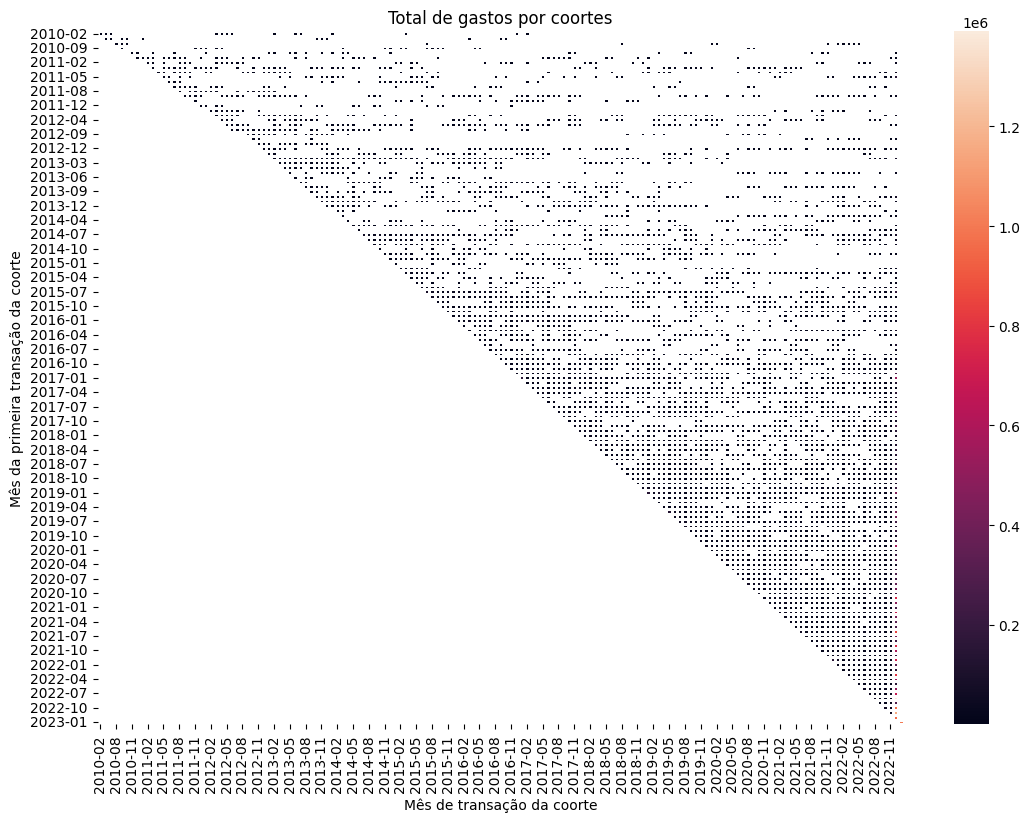

In [73]:
#plotar o gráfico de soma de gastos da coorte

plt.figure(figsize=(13,9))
plt.title('Total de gastos por coortes')
sns.heatmap(transaction_date.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum'),
    annot=False,
    fmt='.2f',
    linewidths=1)
plt.ylabel("Mês da primeira transação da coorte")
plt.xlabel("Mês de transação da coorte")
plt.show()

Conclusão
- A divisão das coortes nos mostra que clientes antigos, nas coortes iniciais em 2010 por exemplo, não movimentaram tanto em transações como clientes mais recentes nas coortes de 2022.

- Conforme a figura, os valores movimentados ao longo do tempo por cliente chegoi a cerca de R$ 1,4 milhões.

- A alternativa para melhor ver caso a caso seria filtrar os dados por ano.

#### 4.4.1.1 Filtrar para os últimos 5 anos para visualização dos dados

In [74]:
#criar uma coluna de ano da primeira transação
transaction_date['first_transaction_year'] = transaction_date['first_transaction_month_year'].dt.year 


In [75]:
#filtrar os dados para valores após 2018
transaction_date_2018_up = transaction_date[transaction_date['first_transaction_year']>=2018]

In [76]:
transaction_date_2018_up.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum',
    fill_value='')

transaction_month_year,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2018-01,29329,50248,17484,5416,32481,41376,25731,830,,722,...,3320,2186,1805,14585,7794,361,2514,,76903,
2018-02,,9464,10768,3912,2316,,652,1304,60,,...,,,5868,3912,6836,1956,,6952,75744,
2018-03,,,79400,61253,21298,16396,61446,40036,1664,10328,...,902,2872,,17799,35486,8416,28612,12820,118334,
2018-04,,,,17750,13030,5580,,1870,1870,14562,...,,,,1870,5580,8370,11160,8370,179930,
2018-05,,,,,16264,10097,9136,4694,2708,14942,...,2343,2412,,,2609,8000,160,13488,155772,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,,,,,,,,,,,...,,,,,,15243,16828,35686,291411,
2022-10,,,,,,,,,,,...,,,,,,,56977,39369,964959,
2022-11,,,,,,,,,,,...,,,,,,,,63724,1160647,


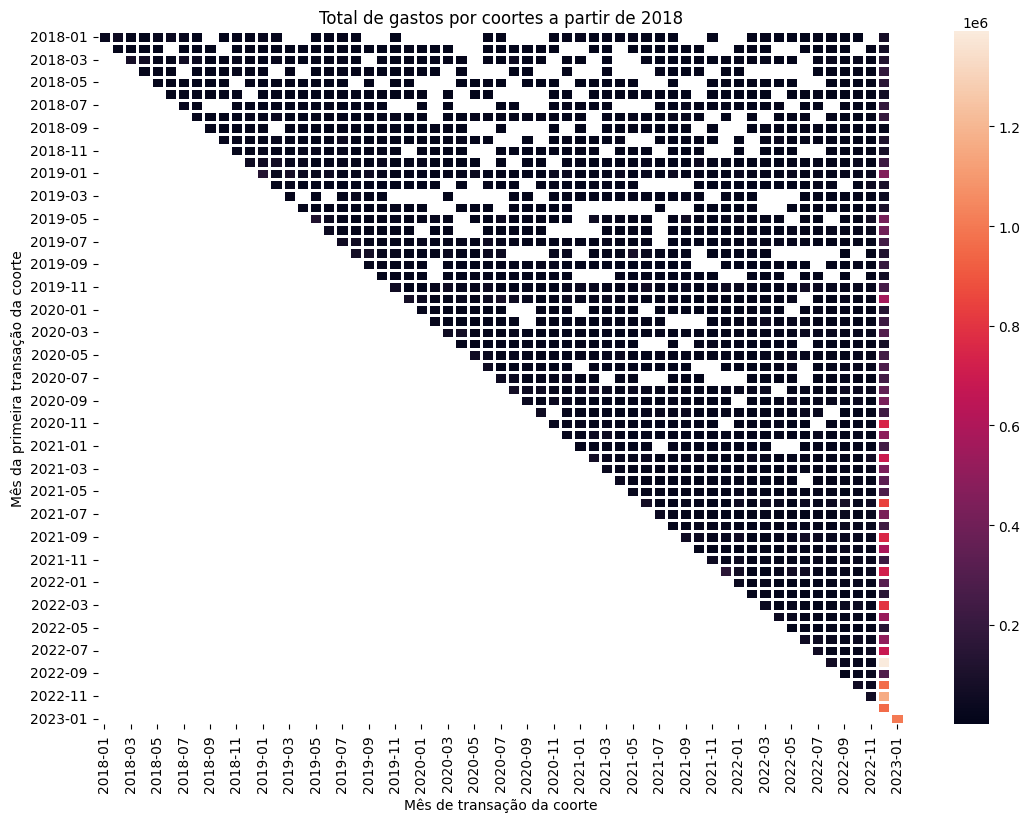

In [77]:
#Plotar o mapa de calor com o total de gastos por cada coorte ao longo do tempo
plt.figure(figsize=(13,9))
plt.title('Total de gastos por coortes a partir de 2018')
sns.heatmap(transaction_date_2018_up.pivot_table(
    index='first_transaction_month_year',
    columns='transaction_month_year',
    values='cod_cliente',
    aggfunc='sum'),
    annot=False,
    fmt='.1f',
    linewidths=1,
)
plt.ylabel("Mês da primeira transação da coorte")
plt.xlabel("Mês de transação da coorte")
plt.show()

Conclusão
- Com a filtragem dos dados para compreender os valores após 2018 temos que os gastos chegaram a cerca de R$ 1,4 milhões em alguns casos e que o período entre novembro de 2022 e janeiro de 2023 foi o mês com maiores gastos realizados em transações para clientes das coortes a partir de maio de 2019.

### 4.4.2 Tempo de vida da coorte

In [78]:
#agrupar os dados das coortes
transaction_grouped_by_cohort = transaction_date.groupby(['first_transaction_month_year','transaction_month_year']
                                                         ).agg({'cod_transacao':'nunique','cod_cliente':'nunique'})

#criar coluna de transação por cliente
transaction_grouped_by_cohort['transacao_por_cliente'] = (
    transaction_grouped_by_cohort['cod_transacao']/transaction_grouped_by_cohort['cod_cliente'])

transaction_grouped_by_cohort = transaction_grouped_by_cohort.reset_index()

#criar a coluna de tempo de vida da coorte

transaction_grouped_by_cohort['tempo_vida_coorte'] = (
    ((transaction_grouped_by_cohort['transaction_month_year'].astype('datetime64[M]') 
     - transaction_grouped_by_cohort['first_transaction_month_year'].astype('datetime64[M]')).dt.days)
    / 30
).astype('int')


#arredondar o resultado
transaction_grouped_by_cohort['tempo_vida_coorte'] = (transaction_grouped_by_cohort['tempo_vida_coorte'].round().astype('int'))

transaction_grouped_by_cohort.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum',
    fill_value='',
) 


tempo_vida_coorte,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2010-02,8.000000,,,,3.0,,,,,,...,,,,,,,,,,
2010-03,2.000000,,,2.0,,,10.0,7.0,,,...,,,,,,,,,,
2010-08,9.000000,4.0,9.0,,,,,,,,...,,2.0,11.0,2.0,2.0,6.0,,,,
2010-09,2.000000,,,,,,,,,,...,,,,,,,,,,
2010-11,2.000000,7.0,,,1.0,,,,3.0,,...,,,,,,,,,,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,4.125000,3.8,4.833333,57.75,,,,,,,...,,,,,,,,,,
2022-10,4.272727,3.888889,65.454545,,,,,,,,...,,,,,,,,,,
2022-11,4.272727,67.636364,,,,,,,,,...,,,,,,,,,,


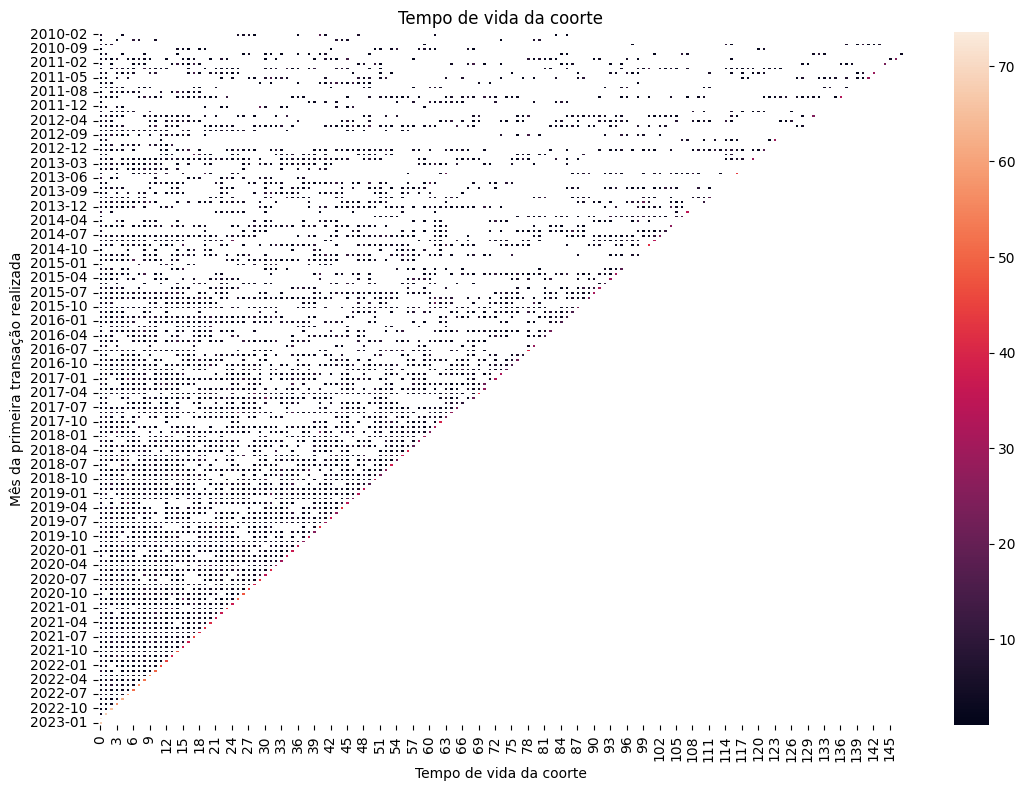

In [79]:
#converter o tipo de dados para numérico

transaction_grouped_by_cohort['tempo_vida_coorte'] = transaction_grouped_by_cohort['tempo_vida_coorte'].astype(int)
#fazer um mapa de calor do tempo de vida da coorte

plt.figure(figsize=(13,9))
plt.title('Tempo de vida da coorte')
sns.heatmap(transaction_grouped_by_cohort.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum'),
    annot=False,
    fmt='.2f',
    linewidths=1,
)
plt.ylabel("Mês da primeira transação realizada")
plt.xlabel("Tempo de vida da coorte")
plt.show()


Conclusão
- Pensando no tempo de vida de cada coorte, a quantidade de transações por cliente é alta no mês zero e apresenta pouca evolução para os meses seguintes em muitos casos. 

- Conforme o gráfico, podemos observar que alguns clientes chegaram a fazer cerca de 70 transações desde sua primeira transação.

- Muita informação no mapa de calor, será necessário separar os dados por ano para melhor visualizar o comportamento do tempode vida da coorte.

#### 4.4.2.1 - Filtrar os dados por ano para melhor visualização da informação - Trabalhar com os últimos 5 anos

In [80]:
#criar primeiro a coluna de ano da primeira transação
transaction_grouped_by_cohort['first_year_transaction'] = transaction_grouped_by_cohort['first_transaction_month_year'].dt.year

In [81]:
#Filtrar os dados para anos após 2018

transaction_grouped_by_cohort_2018_up = transaction_grouped_by_cohort[transaction_grouped_by_cohort['first_year_transaction'] >=2018]

#apresentar os resultados em uma tabela
transaction_grouped_by_cohort_2018_up.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum',
    fill_value='')



tempo_vida_coorte,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
first_transaction_month_year,,,,,,,,,,,,,,,,,,,,,
2018-01,4.000000,12.666667,,2.0,5.5,7.0,3.75,1.0,,2.0,...,3.5,4.0,2.0,5.0,5.666667,3.666667,1.0,4.5,,30.0
2018-02,9.900000,6.0,4.5,,,1.0,2.0,1.0,,1.0,...,,,9.0,6.0,5.0,3.0,,4.666667,29.5,
2018-03,5.500000,6.777778,3.4,5.666667,6.6,4.6,3.0,3.333333,4.0,2.6,...,2.0,,3.0,6.333333,2.5,5.666667,5.5,18.25,,
2018-04,3.250000,2.5,2.0,,1.0,1.0,3.5,7.0,10.0,3.0,...,,1.0,2.0,3.0,4.0,3.0,39.666667,,,
2018-05,2.714286,6.0,3.333333,4.5,2.5,4.75,,5.0,1.0,7.5,...,,5.0,10.0,10.0,4.25,36.4,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,4.125000,3.8,4.833333,57.75,,,,,,,...,,,,,,,,,,
2022-10,4.272727,3.888889,65.454545,,,,,,,,...,,,,,,,,,,
2022-11,4.272727,67.636364,,,,,,,,,...,,,,,,,,,,


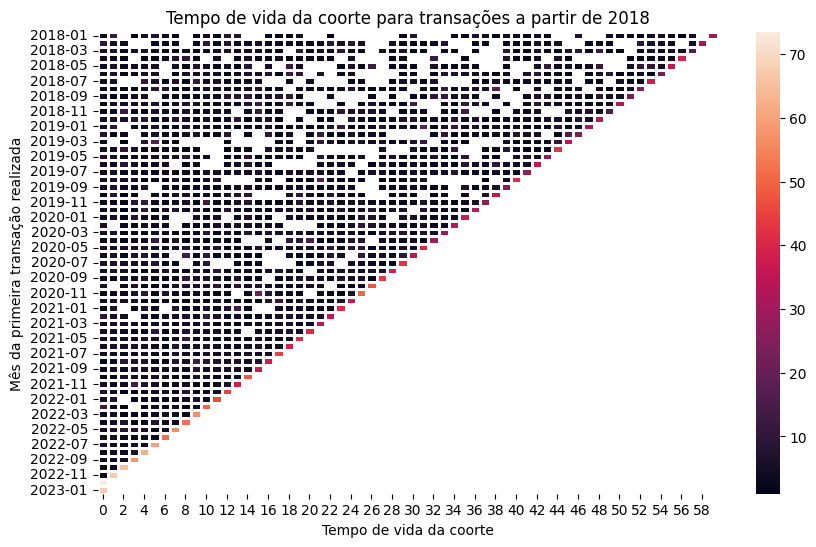

In [82]:
#Montar o mapa de calor para a partir de 2018
plt.figure(figsize=[10,6])
plt.title('Tempo de vida da coorte para transações a partir de 2018')
sns.heatmap(transaction_grouped_by_cohort_2018_up.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='transacao_por_cliente',
    aggfunc='sum'),
    annot=False,
    fmt='.2f',
    linewidths=1,
)
plt.ylabel("Mês da primeira transação realizada")
plt.xlabel("Tempo de vida da coorte")
plt.show()

Conclusão 
- Podemos observar que em alguns pontos específicos os integrantes de cada coorte não realizaram nenhuma transação.

- Para todas as coortes, a maior quantidade de transações foi realizada próximo ao final do período de meses desde sua criação (cerca de 11/2022 e 01/2023), apresentando valores acima de 20 transações.

### 4.5 Taxa de retenção

### 4.5.1 - Transações

In [83]:
print(transaction_grouped_by_cohort.columns)

Index(['first_transaction_month_year', 'transaction_month_year',
       'cod_transacao', 'cod_cliente', 'transacao_por_cliente',
       'tempo_vida_coorte', 'first_year_transaction'],
      dtype='object')


In [84]:
#calcular tempo de vida da coorte

#agrupar os dados das coortes
transaction_grouped_by_cohort = transaction_date.groupby(['first_transaction_month_year','transaction_month_year']
                                                         ).agg({'cod_transacao':'nunique','cod_cliente':'nunique'})

#criar coluna de transação por cliente
transaction_grouped_by_cohort['transacao_por_cliente'] = (
    transaction_grouped_by_cohort['cod_transacao']/transaction_grouped_by_cohort['cod_cliente'])

transaction_grouped_by_cohort = transaction_grouped_by_cohort.reset_index()

#criar a coluna de tempo de vida da coorte

transaction_grouped_by_cohort['tempo_vida_coorte'] = (
    (pd.to_datetime(transaction_grouped_by_cohort['transaction_month_year'].astype(str), format='%Y-%m')
     - transaction_grouped_by_cohort['first_transaction_month_year'].astype('datetime64[M]')).dt.days
    / 30
).astype('int')


#arredondar o resultado
transaction_grouped_by_cohort['tempo_vida_coorte'] = (transaction_grouped_by_cohort['tempo_vida_coorte'].round().astype('int'))

In [85]:
#determinar a contagem inicial de usuários
contagem_inicial_usuários = transaction_grouped_by_cohort[
    transaction_grouped_by_cohort['tempo_vida_coorte']==0][['first_transaction_month_year','cod_cliente']]

#renomear o nome da coluna
contagem_inicial_usuários = contagem_inicial_usuários.rename(
    columns={'cod_cliente':'usuario_coorte'}
)

transaction_grouped_by_cohort = transaction_grouped_by_cohort.merge(contagem_inicial_usuários, on='first_transaction_month_year')

#criar coluna de retenção

transaction_grouped_by_cohort['retencao'] = transaction_grouped_by_cohort[
    'cod_cliente'] / transaction_grouped_by_cohort['usuario_coorte']



In [86]:
#plotando a tabela de retenção
retention_pivot = transaction_grouped_by_cohort.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='retencao',
    aggfunc='mean',
    fill_value=''
)
print(retention_pivot)

tempo_vida_coorte             0         1     2    3    4   5    6    7    \
first_transaction_month_year                                                
2010-02                       1.0                       1.0                 
2010-03                       1.0                  1.0           1.0  1.0   
2010-08                       1.0       1.0   1.0                           
2010-09                       1.0                                           
2010-11                       1.0       1.0             1.0                 
...                           ...       ...   ...  ...  ...  ..  ...  ...   
2022-09                       1.0     0.625  0.75  1.0                      
2022-10                       1.0  0.818182   1.0                           
2022-11                       1.0       1.0                                 
2022-12                       1.0                                           
2023-01                       1.0                                           

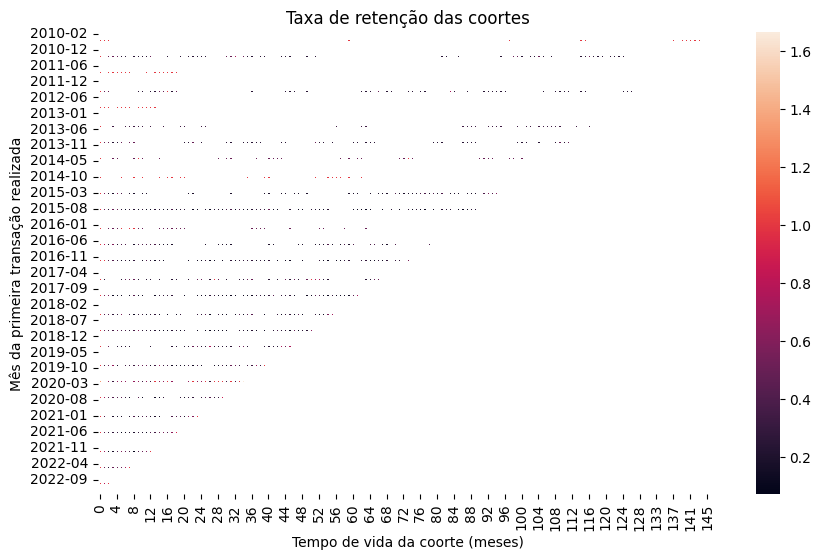

In [87]:
#montar o mapa de calor para a taxa de retenção
plt.figure(figsize=[10,6])
plt.title('Taxa de retenção das coortes')
sns.heatmap(transaction_grouped_by_cohort.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='retencao',
    aggfunc='mean'),
    annot=False,
    fmt='.2f',
    linewidths=1,
)
plt.ylabel("Mês da primeira transação realizada")
plt.xlabel("Tempo de vida da coorte (meses)")
plt.show()

Conclusão 
- Pelos dados podemos observar que há valores clientes cuja taxa de retenção está em 1,0, mas é necessário filtrar mais os dados para a melhor visualização das informações.

- Trabalhar com dados a partir de 2018 conforme realizado anteriormente

#### 4.5.1.1 Transações a partir de 2018

Posso aproveitar que já filtrei os dados anteriormente para o ano de 2018 em diante

In [88]:
#filtrar o conjunto de dados para acima de 2018 

#criar a coluna de tempo de vida da coorte

transaction_grouped_by_cohort_2018_up['tempo_vida_coorte'] = (
    (pd.to_datetime(transaction_grouped_by_cohort_2018_up['transaction_month_year'].astype(str), format='%Y-%m')
     - transaction_grouped_by_cohort_2018_up['first_transaction_month_year'].astype('datetime64[M]')).dt.days/30).astype('int')


#determinar a contagem inicial de usuários
contagem_inicial_usuários_2018 = transaction_grouped_by_cohort_2018_up[
    transaction_grouped_by_cohort_2018_up['tempo_vida_coorte']==0][['first_transaction_month_year','cod_cliente']]

#renomear o nome da coluna
contagem_inicial_usuários_2018 = contagem_inicial_usuários_2018.rename(
    columns={'cod_cliente':'usuario_coorte'}
)

transaction_grouped_by_cohort_2018_up = transaction_grouped_by_cohort_2018_up.merge(contagem_inicial_usuários_2018, on='first_transaction_month_year')

#criar coluna de retenção

transaction_grouped_by_cohort_2018_up['retencao'] = transaction_grouped_by_cohort_2018_up[
    'cod_cliente'] / transaction_grouped_by_cohort_2018_up['usuario_coorte']

transaction_grouped_by_cohort_2018_up['retencao'] = transaction_grouped_by_cohort_2018_up['retencao'].apply(lambda x: min(x, 1.0))

In [89]:
#plotando a tabela de retenção a partir de 2018
retention_pivot = transaction_grouped_by_cohort_2018_up.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='retencao',
    aggfunc='mean',
    fill_value=''
)
print(retention_pivot)

tempo_vida_coorte               0         1         2         3         4   \
first_transaction_month_year                                                 
2018-01                       1.00  0.428571            0.142857  0.571429   
2018-02                       0.85      0.35       0.7                       
2018-03                       1.00       0.9       0.5       0.3       0.5   
2018-04                       1.00       0.5      0.25                0.25   
2018-05                       1.00  0.428571  0.428571  0.285714  0.285714   
...                            ...       ...       ...       ...       ...   
2022-09                       1.00     0.625      0.75       1.0             
2022-10                       1.00  0.818182       1.0                       
2022-11                       1.00       1.0                                 
2022-12                       1.00                                           
2023-01                       1.00                              

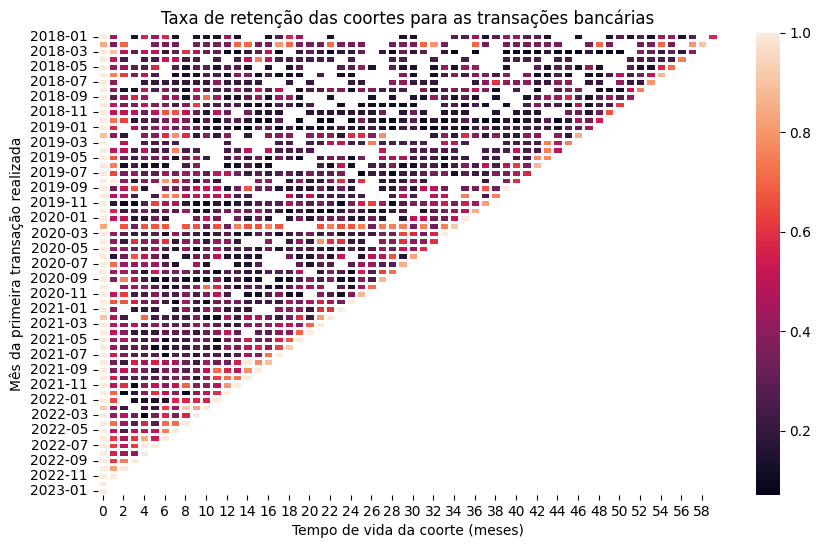

In [90]:
#montar o mapa de calor para a taxa de retenção a partir de 2018
plt.figure(figsize=[10,6])
plt.title('Taxa de retenção das coortes para as transações bancárias')
sns.heatmap(transaction_grouped_by_cohort_2018_up.pivot_table(
    index='first_transaction_month_year',
    columns='tempo_vida_coorte',
    values='retencao',
    aggfunc='mean'),
    annot=False,
    fmt='.2f',
    linewidths=1,
)
plt.ylabel("Mês da primeira transação realizada")
plt.xlabel("Tempo de vida da coorte (meses)")
plt.show()

Conclusão

- Conforme os dados obtidos para as transações a partir de 2018 podemos observar que a taxa de retenção dos clientes está entre 0,4 e 0,6 (40 e 60%), sendo maior para clientes mais novos.

## 5° Machine Learning

- Inicialmente quero copiar os dados da tabela unificada (merged_coorte) para um novo dataframe (ML_data) e trabalhar com esses valores. Para tanto vou primeiro obter as informações desse dataframe (quais colunas constituem ele) e depois separar algum dos dados para fazer a previsão.

### 5.1 Arrumar os dados

In [91]:
ML_data = merged_coorte.copy()

print(ML_data.head())

   num_conta  cod_cliente  cod_agencia  cod_colaborador tipo_conta  \
0         53           53            1                7         PF   
1         53           53            1                7         PF   
2         53           53            1                7         PF   
3         53           53            1                7         PF   
4         53           53            1                7         PF   

              data_abertura  saldo_total  saldo_disponivel  \
0 2011-05-24 15:30:00+00:00    2984.7615           2814.67   
1 2011-05-24 15:30:00+00:00    2984.7615           2814.67   
2 2011-05-24 15:30:00+00:00    2984.7615           2814.67   
3 2011-05-24 15:30:00+00:00    2984.7615           2814.67   
4 2011-05-24 15:30:00+00:00    2984.7615           2814.67   

     data_ultimo_lancamento  cod_transacao  ... taxa_juros_mensal  \
0 2019-07-02 11:03:46+00:00          27467  ...            0.0145   
1 2019-07-02 11:03:46+00:00          27467  ...            0.0233   

In [92]:
ML_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143694 entries, 0 to 143693
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   num_conta               143694 non-null  int64              
 1   cod_cliente             143694 non-null  int64              
 2   cod_agencia             143694 non-null  int64              
 3   cod_colaborador         143694 non-null  int64              
 4   tipo_conta              143694 non-null  object             
 5   data_abertura           143694 non-null  datetime64[ns, UTC]
 6   saldo_total             143694 non-null  float64            
 7   saldo_disponivel        143694 non-null  float64            
 8   data_ultimo_lancamento  143694 non-null  datetime64[ns, UTC]
 9   cod_transacao           143694 non-null  int64              
 10  data_transacao          143694 non-null  datetime64[ns]     
 11  nome_transacao          14

In [93]:
print(ML_data['status_proposta'].value_counts())
print()
print(ML_data['tipo_conta'].value_counts())

status_proposta
Enviada                 38122
Aprovada                36866
Validação documentos    35365
Em análise              33341
Name: count, dtype: int64

tipo_conta
PF    143694
Name: count, dtype: int64


- Pontos a se observar
    - Como o conjunto de dados não possui informações referentes a propostas negadas vou criar uma nova coluna onde vou substituir valores "Enviada" e "Em análise" por zero (False) de forma que não foram aceitas e "Aprovada" e "Validação de documentos" por 1 (True) e utilizar esses dados como base para fazer a previsão.
    - Inicialmente vou deixar a coluna status_proposta sem filtragem de dados. Posteriormente posso utilizar algum desse valores para filtrar e checar se há resultados diferentes.
    - Vale ressaltar que como são muitos dados, preciso realizar a filtragem de dados por ano, usando os dados de 2021 e 2022.
    - Como tipo_conta só tem valores pessoa física, vou remover essa coluna do conjunto de dados para realizar a analise. Além disso, vou remover as colunas com dados do tipo datetime da analise e outras colunas como num_conta	cod_cliente	cod_agencia	cod_colaborador.

In [94]:
print(ML_data['ano'].value_counts().sort_index())

ano
2010    10866
2011    11678
2012    11928
2013    11294
2014    10169
2015    11820
2016    12255
2017    10071
2018     9986
2019    11117
2020    10789
2021    10645
2022    11076
Name: count, dtype: int64


In [95]:
#Filtrar os dados para análise

ML_data = ML_data[(ML_data['ano'] == 2021) | (ML_data['ano']==2022)]

In [96]:
#Criar coluna para separar os dados em 0 e 1

ML_data['proposta_aprov_neg'] = ML_data['status_proposta']

In [97]:
#Separar os dados da nova coluna

#Iterar sobre os indices da coluna
for indice in ML_data.index:
    valor_atual = ML_data.loc[indice,'proposta_aprov_neg']
    # verificar os valores e substituir conforme necessário
    if valor_atual == 'Enviada':
        ML_data.loc[indice,'proposta_aprov_neg'] = 0
    elif valor_atual == 'Em análise':
        ML_data.loc[indice,'proposta_aprov_neg'] = 0
    elif valor_atual == 'Aprovada':
        ML_data.loc[indice,'proposta_aprov_neg'] = 1
    elif valor_atual == 'Validação documentos':
        ML_data.loc[indice,'proposta_aprov_neg'] = 1

In [98]:
# Conferindo se trocou os dados
print(ML_data['proposta_aprov_neg'].value_counts())

proposta_aprov_neg
0    11568
1    10153
Name: count, dtype: int64


In [99]:
ML_data.head()

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento,cod_transacao,...,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta,ano,data_dma,proposta_aprov_neg
800,472,472,1,7,PF,2022-08-07 12:08:00+00:00,4178.4237,4183.68,2022-12-30 00:00:00.675160+00:00,5328,...,92799.684313,110491.76,17692.075687,4646.420519,23,5,Enviada,2021,2022-11-21,0
801,472,472,1,7,PF,2022-08-07 12:08:00+00:00,4178.4237,4183.68,2022-12-30 00:00:00.675160+00:00,5328,...,63875.528352,126975.98,63100.451648,1152.697088,83,5,Enviada,2022,2022-11-21,0
802,472,472,1,7,PF,2022-08-07 12:08:00+00:00,4178.4237,4183.68,2022-12-30 00:00:00.675160+00:00,5328,...,141927.148177,226944.41,85017.261823,4108.082000,57,2,Aprovada,2022,2022-11-21,1
803,472,472,1,7,PF,2022-08-07 12:08:00+00:00,4178.4237,4183.68,2022-12-30 00:00:00.675160+00:00,12925,...,92799.684313,110491.76,17692.075687,4646.420519,23,5,Enviada,2021,2022-12-29,0
804,472,472,1,7,PF,2022-08-07 12:08:00+00:00,4178.4237,4183.68,2022-12-30 00:00:00.675160+00:00,12925,...,63875.528352,126975.98,63100.451648,1152.697088,83,5,Enviada,2022,2022-12-29,0


In [100]:
#remover colunas que não participam na previsão dos valores
colunas_para_remover = ['tipo_conta', 'data_abertura', 'data_ultimo_lancamento', 'data_transacao',
                        'data_entrada_proposta', 'data_dma', 'nome_transacao', 'status_proposta',
                        'data', 'num_conta', 'cod_cliente', 'cod_agencia', 'cod_colaborador', 'ano',
                        'day_of_week', 'ano_transacao', 'day', 'cod_proposta','cod_transacao']

ML_data.drop(columns=colunas_para_remover, inplace=True)		

#### 5.1.1 Dividindo o conjunto de dados - quero prever valor proposta financiamento

In [101]:
# Dividir o conjunto de dados
X =  ML_data.drop(columns=['proposta_aprov_neg'])
y = ML_data['proposta_aprov_neg']

In [102]:
#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 5.1.2 Dendrograma

In [103]:
#criando um objeto StandardScaler object e aplicando isso ao conjunto de treino
sc = StandardScaler()

#treinar o scaler e transformar a matriz para um conjunto de treino
X_train_st = sc.fit_transform(X_train)

linked = linkage(X_train_st, method='ward')

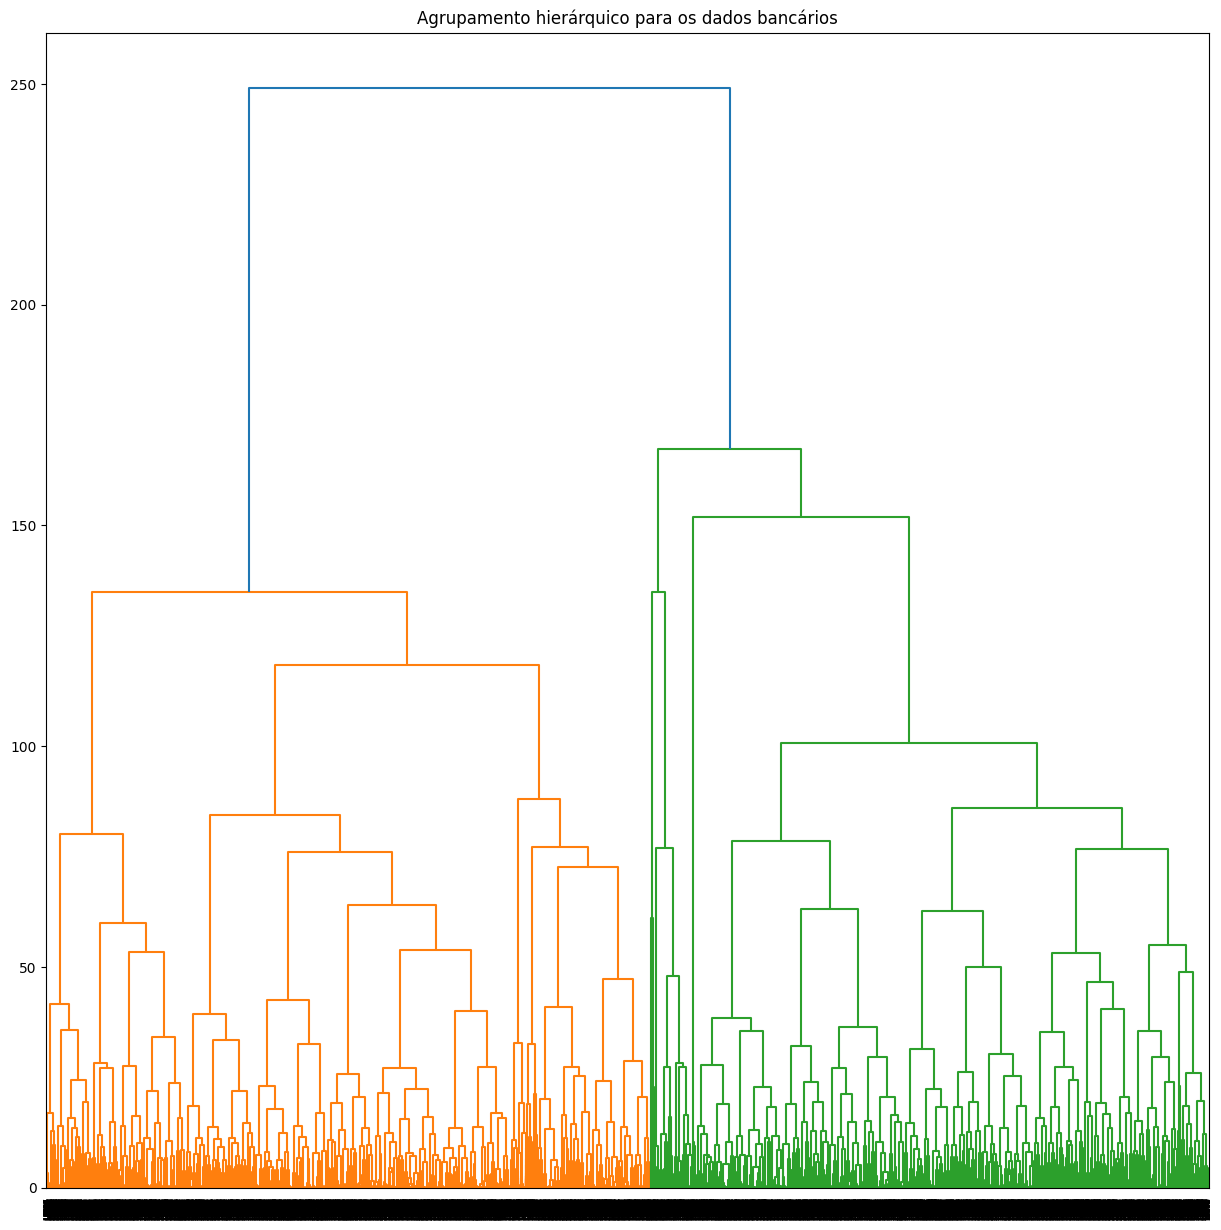

In [104]:
#plotando o dendrograma

plt.figure(figsize=[15,15])
dendrogram(linked, orientation='top')
plt.title('Agrupamento hierárquico para os dados bancários')
plt.show()

- Com base no resultado obtido com o dendrograma observo que existem 3 grupos diferentes entre os clientes. Com base nisso vou utilizar duas vezes esse valor (6) para separar os agrupamentos no K-means.

#### 5.1.3 Treinar o grupo com k-means

In [105]:
#definir a função para apresentar gráficos de características emparelhadas para agrupamentos
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=[10,10])
    sns.scatterplot(x=x_name, y=y_name, hue=cluster_name, data=df, palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [106]:
#padronizando os dados
sc = StandardScaler()
X_sc = sc.fit_transform(ML_data)

In [107]:
#definição do modelo k-means com 6 clusters
km = KMeans(n_clusters = 6)

#prever os clusters para as observações
labels = km.fit_predict(X_sc)

In [108]:
#armazenar as etiquetas de agrupamento no nosso DataFrame
ML_data['cluster'] = labels

In [109]:
#obtenção das estatísticas dos valores médios das características por agrupamento
ML_data.groupby(['cluster']).mean() 

,saldo_total,saldo_disponivel,valor_transacao,month,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,proposta_aprov_neg
cluster,,,,,,,,,,,,
0,33099.663824,32350.061016,247.235896,8.604455,0.015087,36165.337298,53567.290072,17401.952774,2407.810535,55.337942,1.460829,0.237327
1,24525.966760,23313.363596,185.162875,8.100422,0.015326,123997.912715,187180.391061,63182.478346,7829.748723,44.092135,2.671596,0.781118
2,14415.412525,15002.313580,165.420678,9.190354,0.019355,116829.740005,170340.420291,53510.680285,3124.147951,84.194505,3.532912,0.059696
3,10638.806435,10343.773200,114.689469,9.069504,0.017296,39328.565934,58765.724251,19437.158317,2042.413219,72.311651,4.462817,0.651469
4,60095.906200,57983.040000,852.691765,8.191176,0.011600,187941.965064,225117.540000,37175.574936,190122.091859,1.000000,6.000000,0.0
5,144543.435784,137818.541882,3153.353114,8.687305,0.016136,80507.644011,120881.686079,40374.042068,2372.273271,79.595372,3.022514,0.564103


- Conclusão

    - Com base nesses resultados podemos ver que clientes no cluster 0 possuem maior chance de terem as propostas aceitas (valores para proposta_aprov_neg mais proximos de 1) e que clientes dos clusters 2 e 5 não tem chance de ter suas propostas de financiamento aceitas.
    - Assim, temos:
        - Valores médios do Cluster 0 - Clientes com saldo total de R$ 20 mil, transações médias de R$ 31, com valor da proposta de R$ 122 mil, valor do Financiamento de R$ 185 mil, com parcelas de R$ 6078 em 45 vezes e carência de 2,55 anos
        - Valores médios do cluster 2 - Saldo total de R$ 13 mil, com transações médias de R$ 155, com valor da proposta de R$ 110 mil, valor total do financiamento de R$ 162 mil, com entrada de R$ 52 mil e prestação de R$ 3016  em 82 vezes e carência de 3,5 anos
        - Valores médios do cluster 5 - Saldo total de R$ 34 mil, com transações de R$ 459, com proposta de R$ 95 mil e financiamento no valor de R$ 132 mil, com entrada de R$ 36 mil e parcela de R$ 86855 em 1,23 vezes.
    
    - O valor mais impactante nesses casos é o valor da prestação. Em todos os financiamentos o valor médio é alto, porém no cluster 0 o valor da prestação é maior (refletindo em menor quantidade de parcelas) enquanto nas demais o valor da prestação ou é muito baixo (R$ 3016) ou muito alto representando maior risco (R$ 86855).
    - Vale ressaltar que os clientes do cluster 4 possuem um alto saldo, a proposta de financiamento não é muito alta porém o valor médio das transações é de R$ 2834 o que mostra muitos gastos mensais com outras transações (crédito,debito, pix...)
    - Demais clusters (1, 4 e 5) apresentam valores médios de 0,46, 0,58 e 0,56 (respectivamente) Mostrando que esses clientes podem (ou não) ter seus financiamentos aprovados e que outros fatores podem influenciar nisso (como historico do cliente com o banco)   
        - Vale ressaltar que os dados estão filtrados para o ano de 2021 e 2022 e que nos anos anteriores o cliente pode ter tido um histórico melhor


- Esses dados servem de base para poder categorizar os clientes e ver se o financiamento que eles querem fazer se enquadra no perfil que eles tem.

In [110]:
#obtendo o total de individuos por categoria
ML_data.groupby(['cluster']).count() 

,saldo_total,saldo_disponivel,valor_transacao,month,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,proposta_aprov_neg
cluster,,,,,,,,,,,,
0,3906,3906,3906,3906,3906,3906,3906,3906,3906,3906,3906,3906
1,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154,6154
2,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059,5059
3,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935
4,68,68,68,68,68,68,68,68,68,68,68,68
5,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


- Conclusão
    - Podemos observar que, com exceção do cluster 5, todos os clusters possuem mais de mil informações, em alguns casos mais de 4 mil.

In [111]:
# Obter as 5 primeiras linhas do novo dataframe
ML_data.head()

,saldo_total,saldo_disponivel,valor_transacao,month,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,proposta_aprov_neg,cluster
800,4178.4237,4183.68,-25.0,11,0.0121,92799.684313,110491.76,17692.075687,4646.420519,23,5,0,3
801,4178.4237,4183.68,-25.0,11,0.0104,63875.528352,126975.98,63100.451648,1152.697088,83,5,0,2
802,4178.4237,4183.68,-25.0,11,0.0191,141927.148177,226944.41,85017.261823,4108.082000,57,2,1,1
803,4178.4237,4183.68,-390.0,12,0.0121,92799.684313,110491.76,17692.075687,4646.420519,23,5,0,3
804,4178.4237,4183.68,-390.0,12,0.0104,63875.528352,126975.98,63100.451648,1152.697088,83,5,0,2


In [112]:
'''#construir um gráfico pairplot para ver todos os resultados

plt.figure(figsize=[30,30])
sns.pairplot(ML_data)
plt.show()'''

'#construir um gráfico pairplot para ver todos os resultados\n\nplt.figure(figsize=[30,30])\nsns.pairplot(ML_data)\nplt.show()'

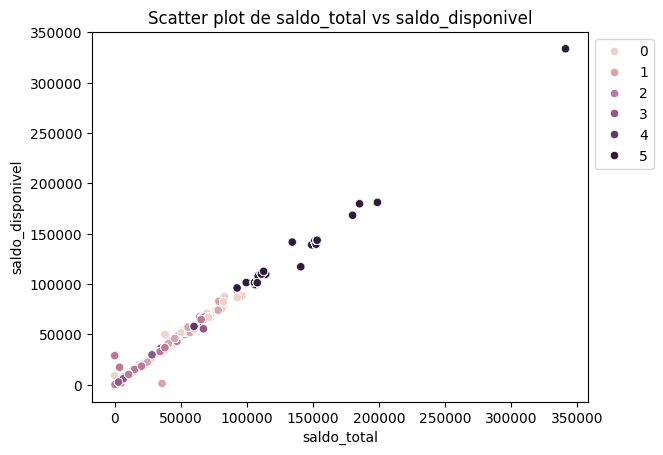

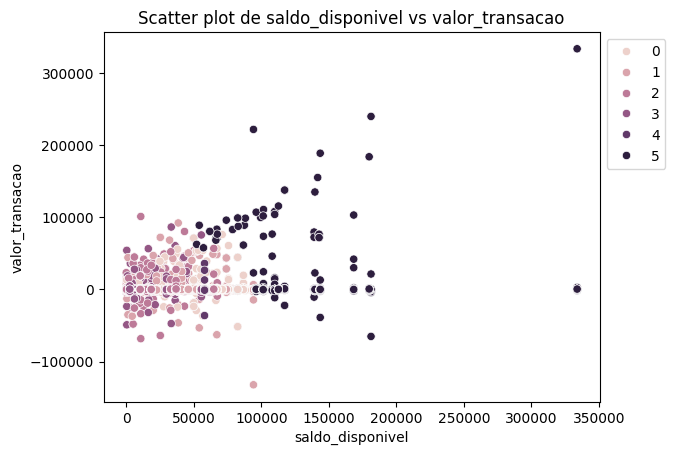

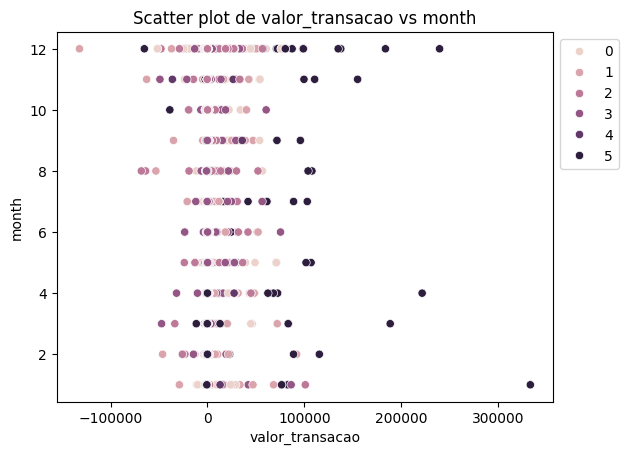

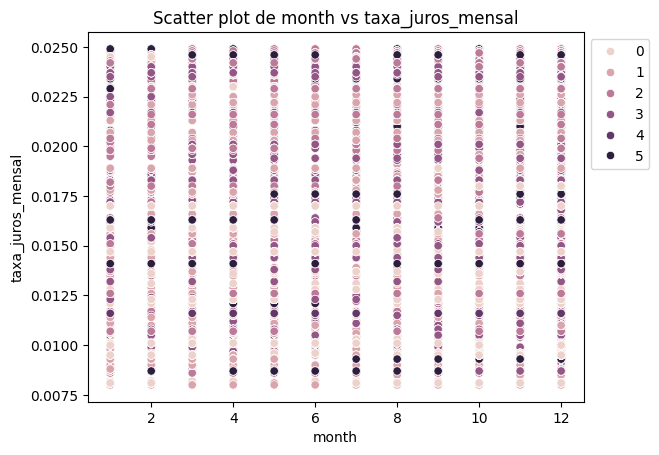

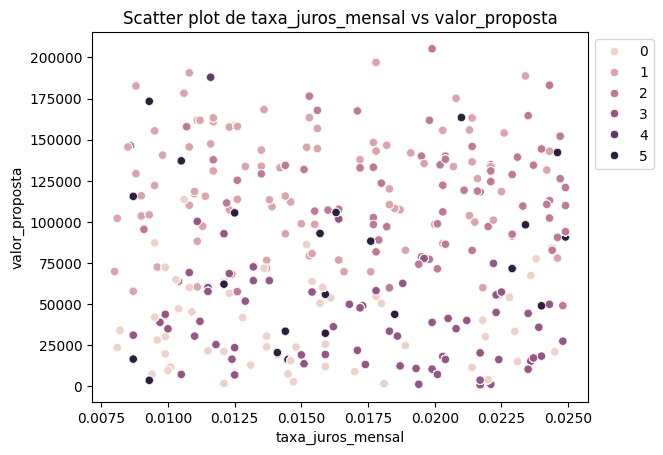

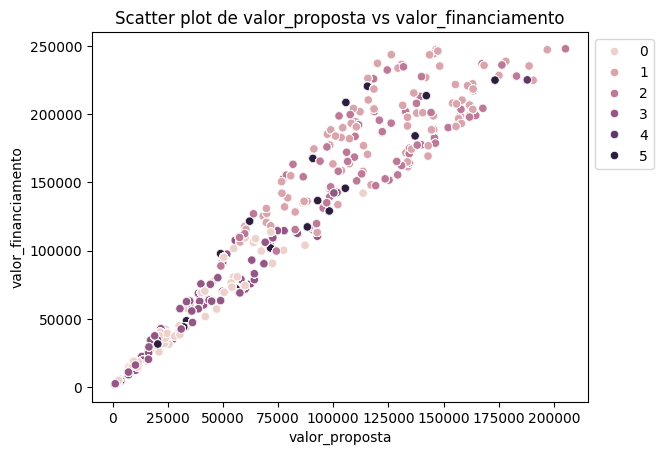

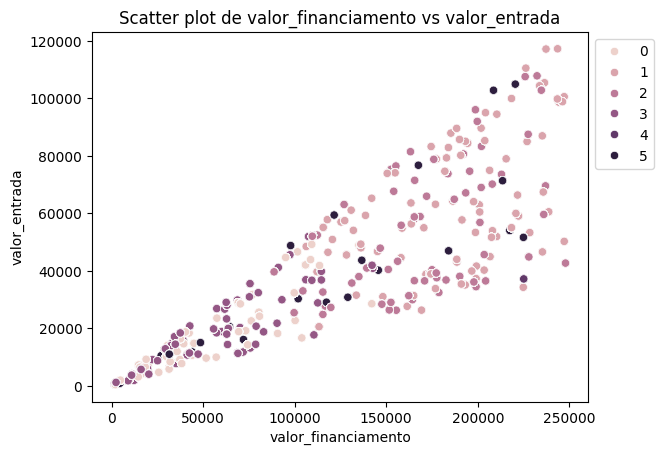

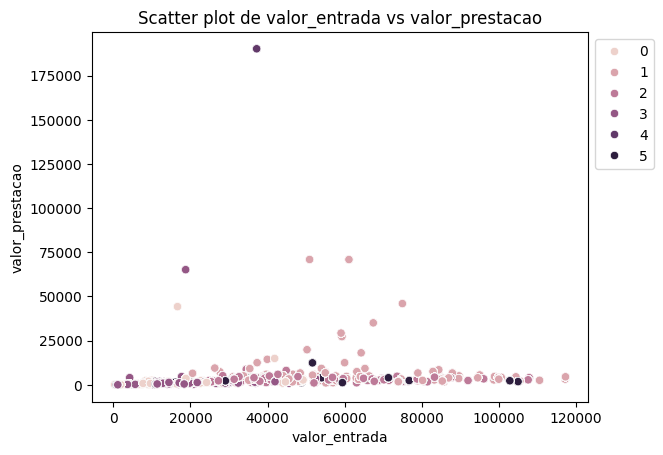

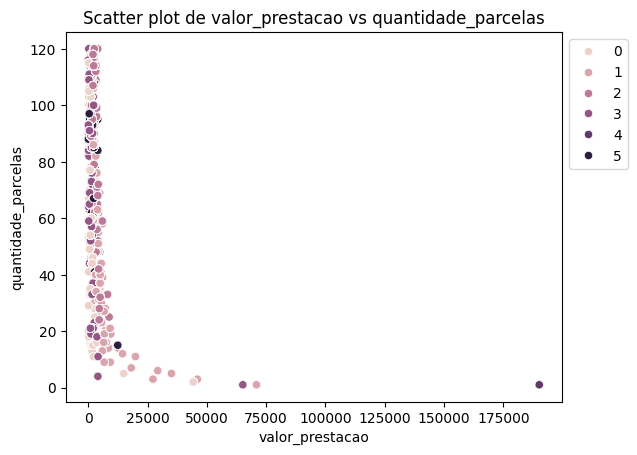

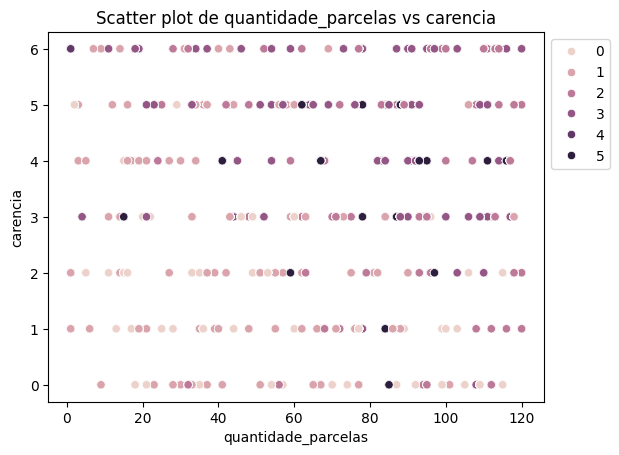

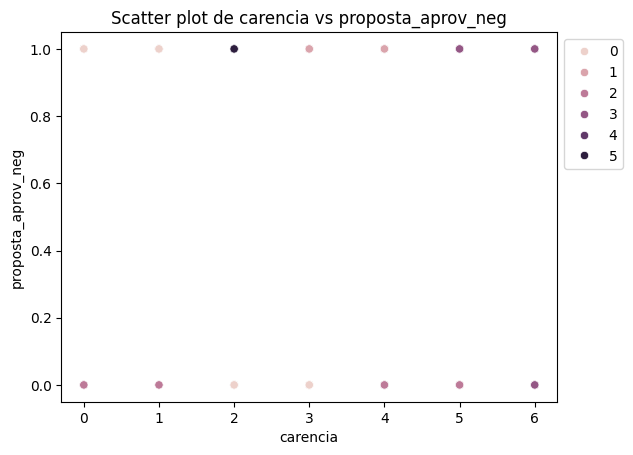

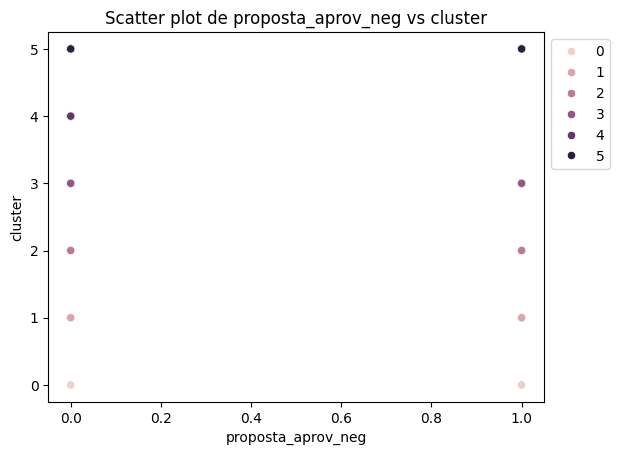

In [113]:
#fazer diagramas da distribuição pareada variável característica-objetivo para cada característica
for i in range(len(ML_data.columns) - 1):
    col = ML_data.columns[i]
    col_next = ML_data.columns[i + 1]
    sns.scatterplot(x=col, y=col_next, hue='cluster', data=ML_data)
    plt.xlabel(col)
    plt.ylabel(col_next)
    plt.title('Scatter plot de {} vs {}'.format(col, col_next))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

- Com base nos gráficos, é possivel ver uma maior separação dos grupos no scatter plot de valor_financiamento vs valor_entrada, e valor_proposta vs valor_financiamento. Nos demais dados o conjunto de dados está misturados.
- Uma melhor visualização pode ser vista na sequência.

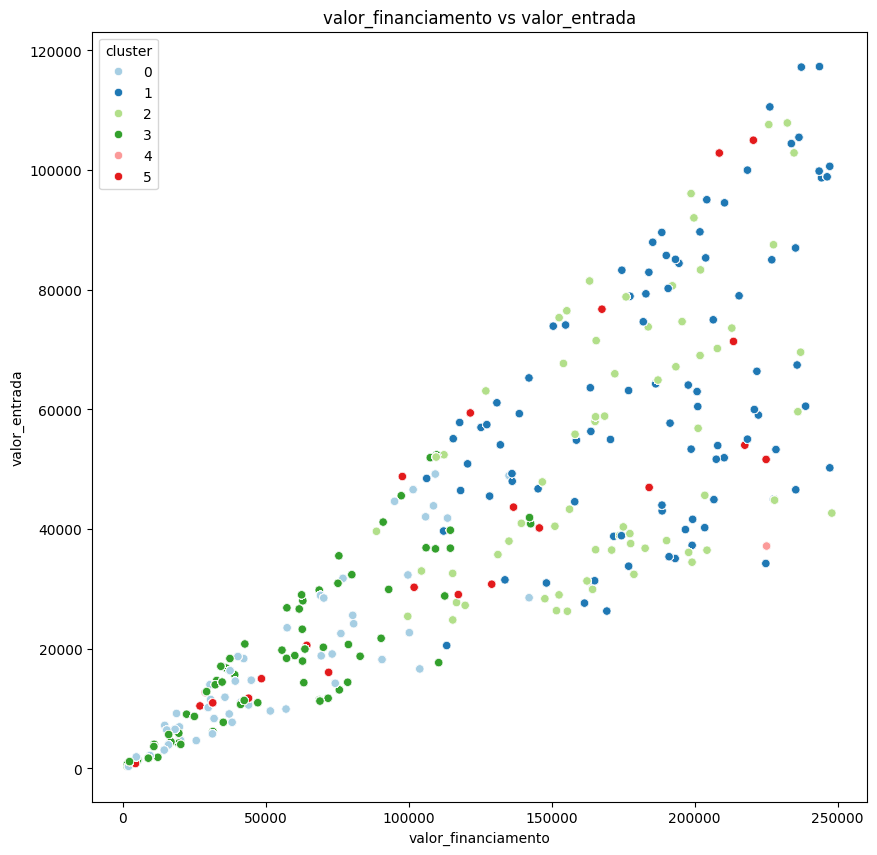

In [114]:
#renderizar o gráfico para as características emparelhadas

show_clusters_on_plot(ML_data,'valor_financiamento','valor_entrada','cluster')

- Conclusão
    - É possivel observar que há uma distinção e concnetração nos grupos de dados onde temos parte dos grupos com valor do financiamento até aproximadamente R$ 150 mil e entrada até de R$ 0 a 60 mil e dados com financiamentos acima de R$ 150 mil e entrada de 20 mil a aproximadamente 120 mil

### 5.2 - Treino com regressão logistica

- Padronizar o total de dados 0 e 1 do conjunto de dados


In [115]:
ML_data_copy = ML_data.copy()

In [116]:
column_name = 'proposta_aprov_neg'

# Filtrar o DataFrame para obter apenas as linhas com valor 0 e 1 na coluna específica
df_0 = ML_data_copy[ML_data_copy[column_name] == 0]
df_1 = ML_data_copy[ML_data_copy[column_name] == 1]

# Selecione aleatoriamente uma amostra do mesmo tamanho da classe minoritária (1)
sample_size = min(len(df_0), len(df_1))
sample_0 = df_0.sample(n=sample_size, random_state=0)
sample_1 = df_1.sample(n=sample_size, random_state=0)

# Concatenar as amostras em um único DataFrame
dados_balanceados = pd.concat([sample_0, sample_1])

In [117]:
dados_balanceados['proposta_aprov_neg'].value_counts()

proposta_aprov_neg
0    10153
1    10153
Name: count, dtype: int64

In [118]:
# Dividir o conjunto de dados
X =  dados_balanceados.drop(columns=['proposta_aprov_neg'])
y = dados_balanceados['proposta_aprov_neg']

In [119]:
#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
#conferir o tipo de dados de y_train
print(y_train.dtype)
print(y_test.dtype)

object
object


In [121]:
#converter y_train de object para o tipo int

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [122]:
#treinar o StandardScaler com o conjunto de treino 

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [123]:
#transformar os conjuntos de treino e de teste

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [124]:
#definir a função para determinar a accuracy, precision, recall
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metric'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [125]:
#definindo o modelo de regressão logistica

lr_model = LogisticRegression(random_state=0)

#treinando o modelo
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [126]:
#usando o modelo para fazer predições

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

#mostrar as métricas
print_all_metrics(y_test, lr_predictions,lr_probabilities, title= 'Métricas para a regressão logística')

Métricas para a regressão logística
	Accuracy: 0.59
	Precision: 0.60
	Recall: 0.58


### 5.3 Treinar o modelo com random forest

In [127]:
# Dividir o conjunto de dados
X =  dados_balanceados.drop(columns=['proposta_aprov_neg'])
y = dados_balanceados['proposta_aprov_neg']

In [128]:
#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
#conferir o tipo de dados de y_train
print(y_train.dtype)
print(y_test.dtype)

object
object


In [130]:
#converter y_train de object para o tipo int

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [131]:
#treinar o StandardScaler com o conjunto de treino 

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [132]:
#transformar os conjuntos de treino e de teste

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [133]:
#definir a função para determinar a accuracy, precision, recall
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metric'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [134]:
#definir o modelo random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

#treinar o modelo
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [135]:
#usando o random forest para fazer predições
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

#mostrar todas as métricas

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metricas para random forest')

Metricas para random forest
	Accuracy: 1.00
	Precision: 1.00
	Recall: 1.00


- Conclusão

- De acordo com os resultados obtidos a partir da regressão logística, obtivemos os seguintes resultados:
    - Accuracy: 0.81
	- Precision: 0.84
	- Recall: 0.77

- Quanto às previsões da random forest, obtivemos os seguintes resultados::
    - Accuracy: 1.00
	- Precision: 1.00
	- Recall: 1.00

- Isto significa que tem algo errado com o random forest

In [136]:
x_status = dados_balanceados.drop(['proposta_aprov_neg'],axis=1)
y_status = dados_balanceados['proposta_aprov_neg']
x_status.shape,y_status.shape
  
x_train, x_test, y_train, y_test = train_test_split(x_status, y_status, test_size=0.4,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

def clf(model_clf,x_status, y_status,x_train, x_test, y_train, y_test):
    model_clf.fit(x_train, y_train)
    y_train_pred = model_clf.predict(x_train)
    y_test_pred= model_clf.predict(x_test)
    
    class_train_rep = classification_report(y_train, y_train_pred)
    print("Train:","\n",class_train_rep)

    class_test_rep = classification_report(y_test, y_test_pred)
    print("Test:","\n",class_test_rep)